In [2]:
import tensorflow as tf

# Load MNIST data
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape the images
train_images = train_images.reshape(train_images.shape[0], -1).astype('float32') / 255

# Create a dataset for each digit
datasets = []
for digit in range(10):
    idx = train_labels == digit
    digit_images = train_images[idx]
    datasets.append(tf.data.Dataset.from_tensor_slices(digit_images).shuffle(1000).batch(60))


In [3]:
class GMMN(tf.keras.Model):
    def __init__(self):
        super(GMMN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(256, activation='relu')
        self.dense3 = tf.keras.layers.Dense(512, activation='relu')
        self.dense4 = tf.keras.layers.Dense(784, activation='sigmoid')  # MNIST images are 28x28=784 pixels

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)


In [4]:
def compute_kernel(x, y, sigma_list):
    """Computes a Gaussian kernel between two sets of samples using multiple bandwidth parameters."""
    beta_list = [1.0 / (2.0 * sigma**2) for sigma in sigma_list]
    x_size = tf.shape(x)[0]
    y_size = tf.shape(y)[0]
    dim = tf.cast(tf.shape(x)[1], tf.float32)
    x_expanded = tf.expand_dims(x, 1)
    y_expanded = tf.expand_dims(y, 0)
    kernel_val = 0.
    for beta in beta_list:
        beta = tf.cast(beta, tf.float32)
        squared_diff = tf.reduce_sum(tf.square(x_expanded - y_expanded), 2)
        kernel_val += tf.exp(-beta * squared_diff)
    return kernel_val / tf.cast(tf.size(sigma_list), tf.float32)

def compute_mmd(x, y, sigma_list=[2, 5, 10, 20, 40, 80]):
    """Computes the Maximum Mean Discrepancy (MMD) between two sets of samples, x and y."""
    x_kernel = compute_kernel(x, x, sigma_list)
    y_kernel = compute_kernel(y, y, sigma_list)
    xy_kernel = compute_kernel(x, y, sigma_list)
    return tf.reduce_mean(x_kernel) + tf.reduce_mean(y_kernel) - 2 * tf.reduce_mean(xy_kernel)


In [5]:
import matplotlib.pyplot as plt

models = [GMMN() for _ in range(10)]

def generate_images(model, digit, num_images=10):
    noise = tf.random.normal([num_images, 100])
    generated_images = model(noise)
    generated_images = tf.reshape(generated_images, (-1, 28, 28))

    fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
    for i, ax in enumerate(axes):
        ax.imshow(generated_images[i, :, :], cmap='gray')
        ax.axis('off')
    plt.suptitle(f'Generated Images for Digit {digit}')
    plt.show()


Training model for digit 8
Epoch 1, MMD Loss: 0.026980876922607422


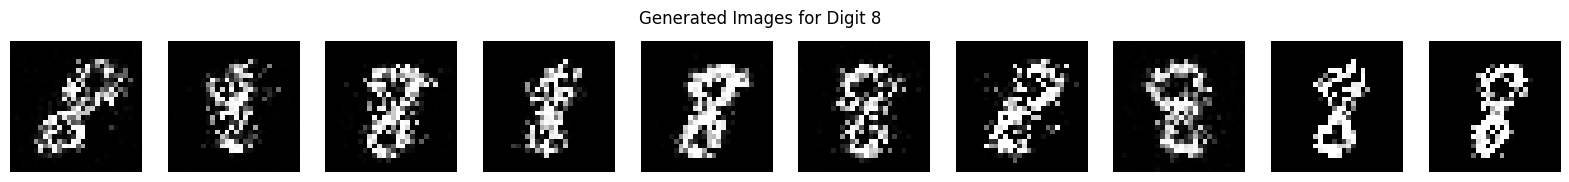

Epoch 2, MMD Loss: 0.027048707008361816


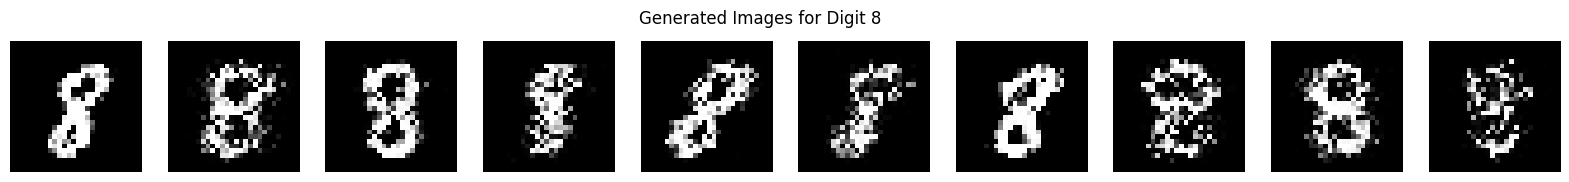

Epoch 3, MMD Loss: 0.025823235511779785


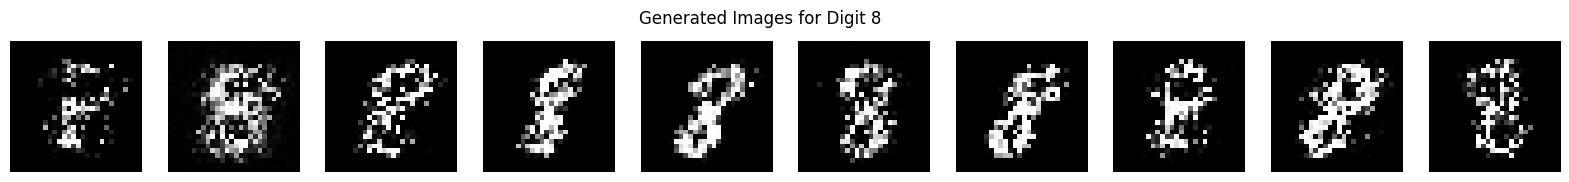

Epoch 4, MMD Loss: 0.029355764389038086


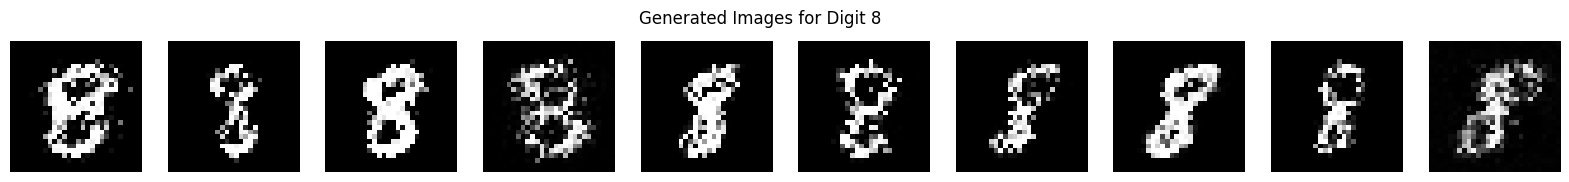

Epoch 5, MMD Loss: 0.028128504753112793


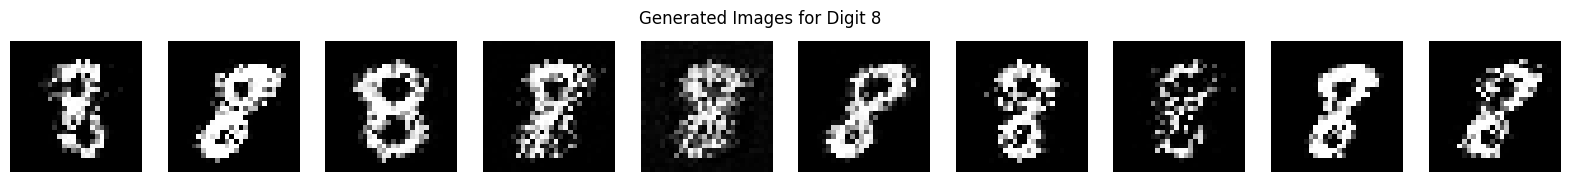

Epoch 6, MMD Loss: 0.025797009468078613


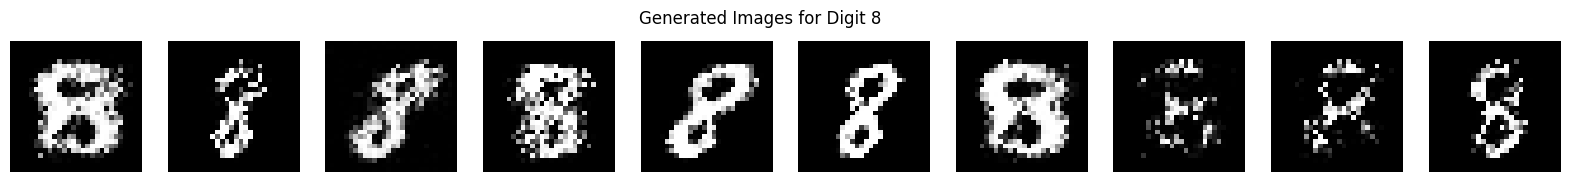

Epoch 7, MMD Loss: 0.028171777725219727


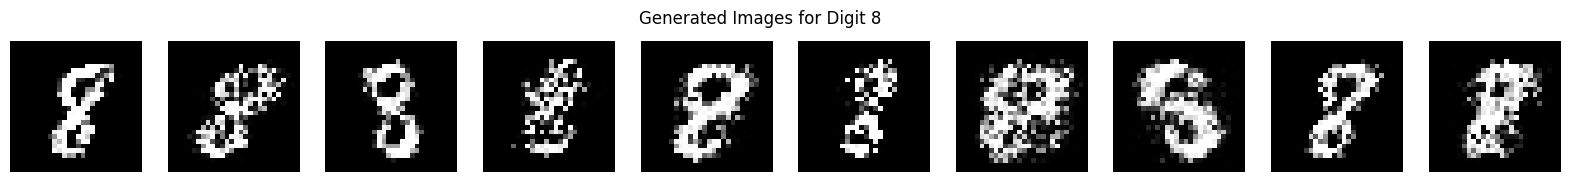

Epoch 8, MMD Loss: 0.026982903480529785


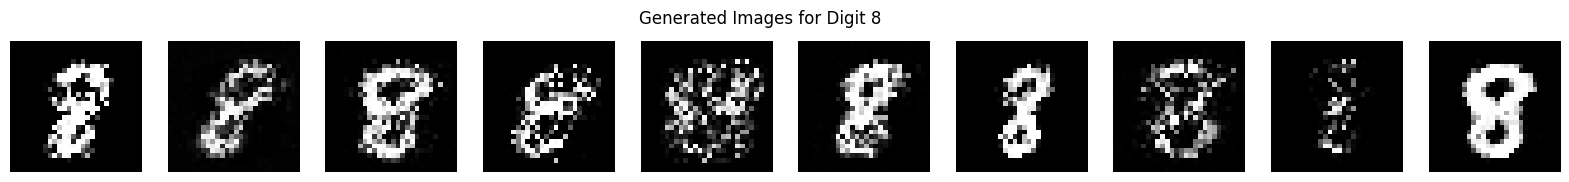

Epoch 9, MMD Loss: 0.030527114868164062


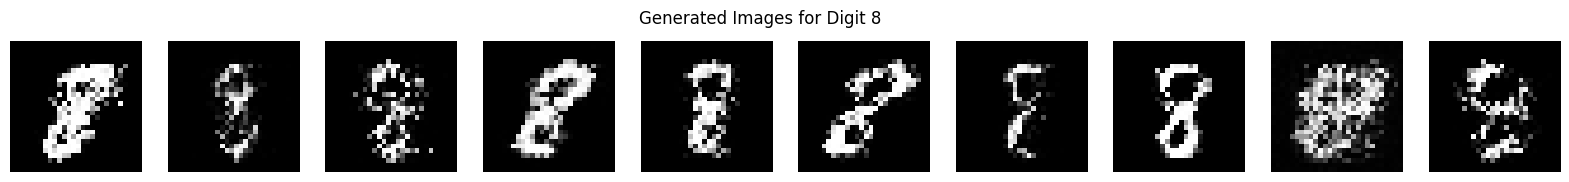

Epoch 10, MMD Loss: 0.027453064918518066


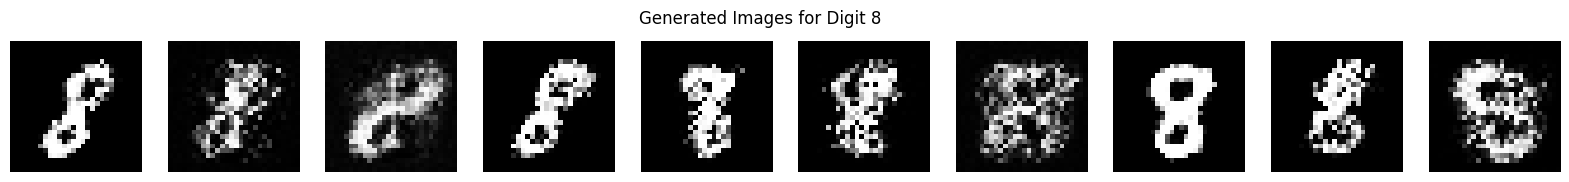

Epoch 11, MMD Loss: 0.026311039924621582


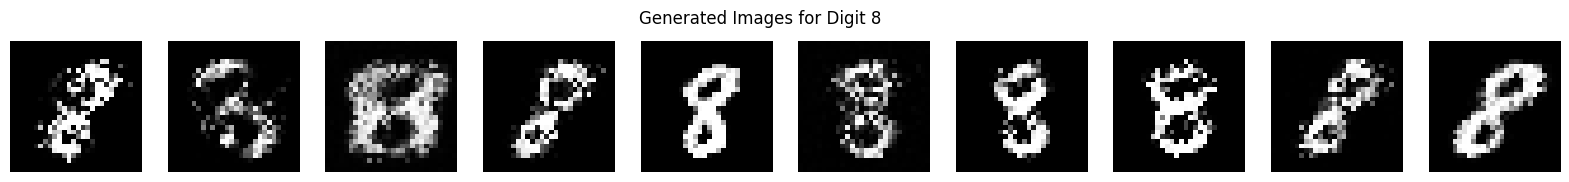

Epoch 12, MMD Loss: 0.022669315338134766


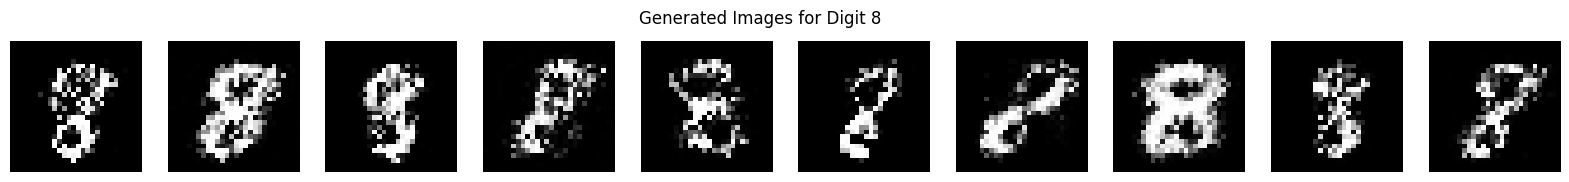

Epoch 13, MMD Loss: 0.023038268089294434


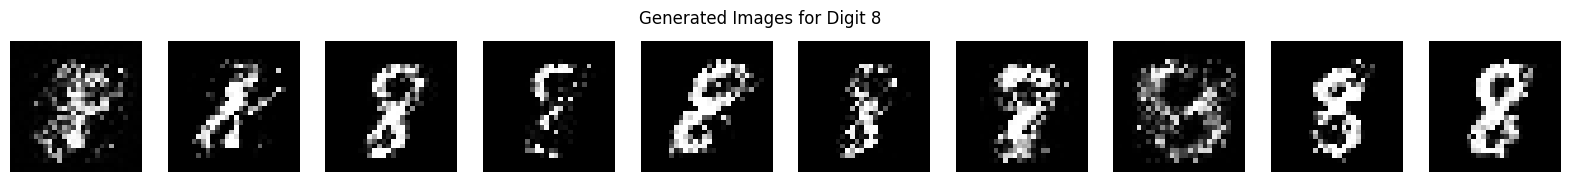

Epoch 14, MMD Loss: 0.025933265686035156


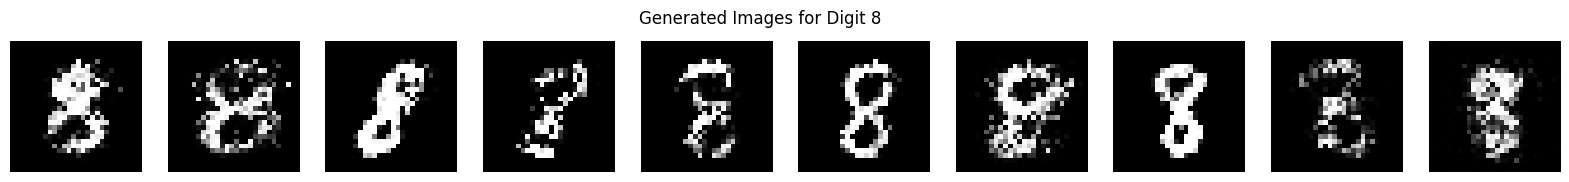

Epoch 15, MMD Loss: 0.024262547492980957


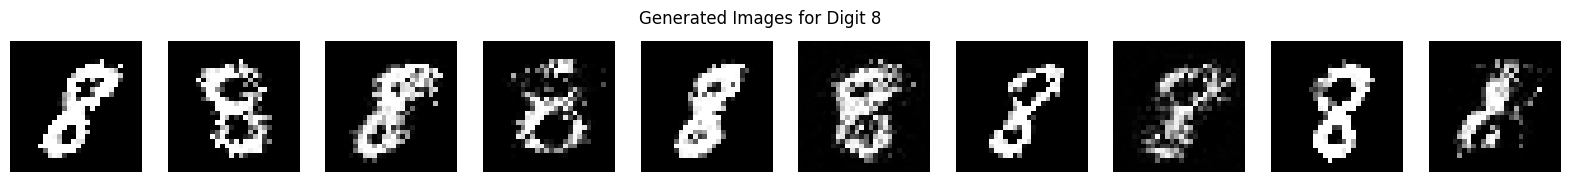

Epoch 16, MMD Loss: 0.024071216583251953


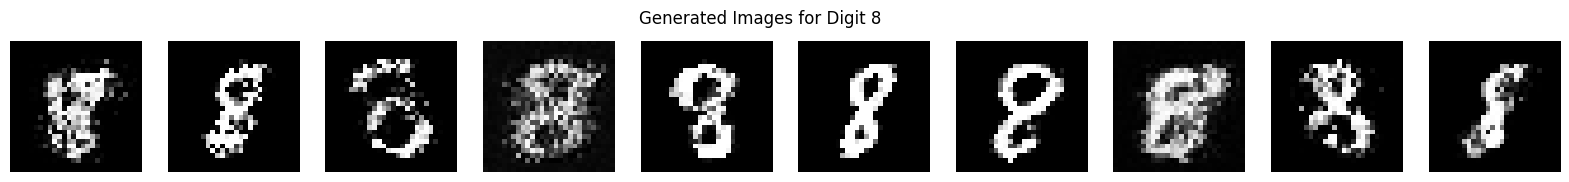

Epoch 17, MMD Loss: 0.0258711576461792


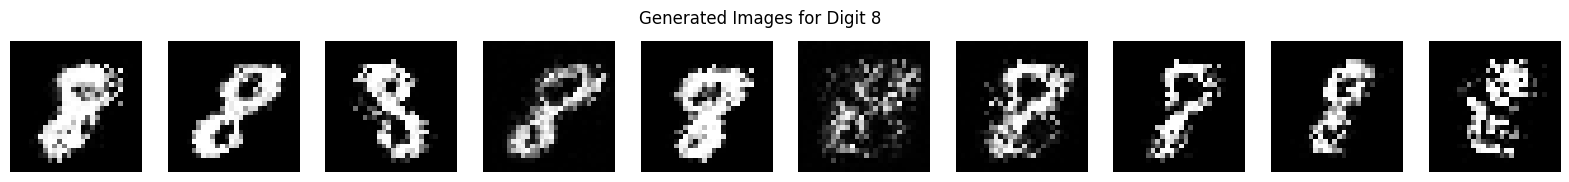

Epoch 18, MMD Loss: 0.023885130882263184


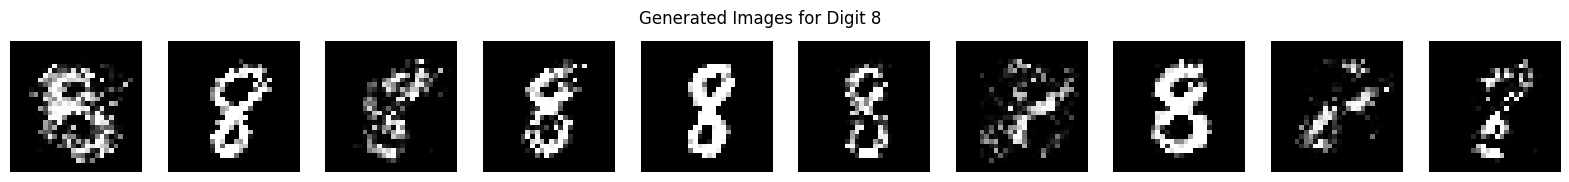

Epoch 19, MMD Loss: 0.022406458854675293


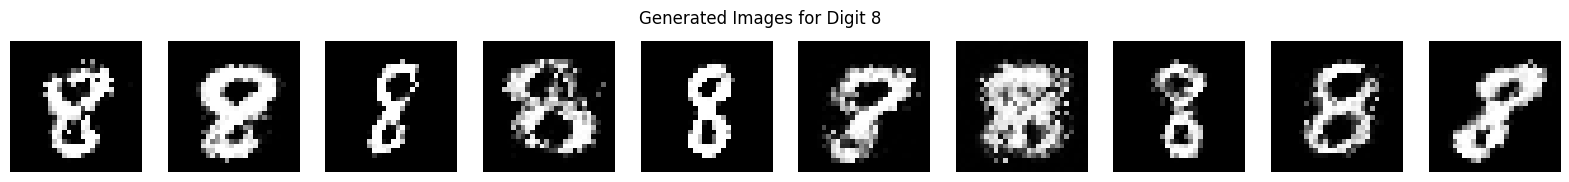

Epoch 20, MMD Loss: 0.026836276054382324


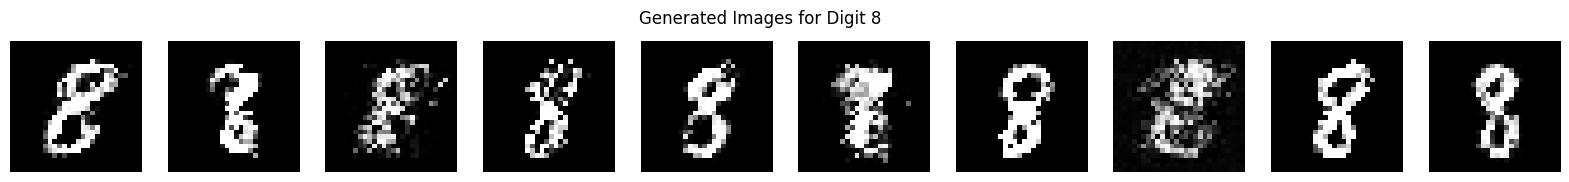

Epoch 21, MMD Loss: 0.032474517822265625


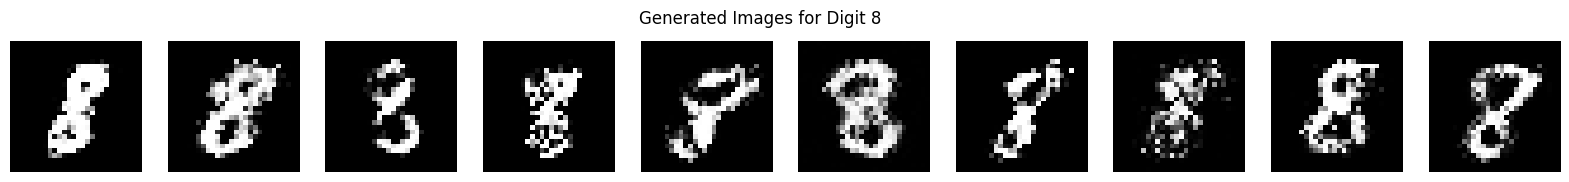

Epoch 22, MMD Loss: 0.026883244514465332


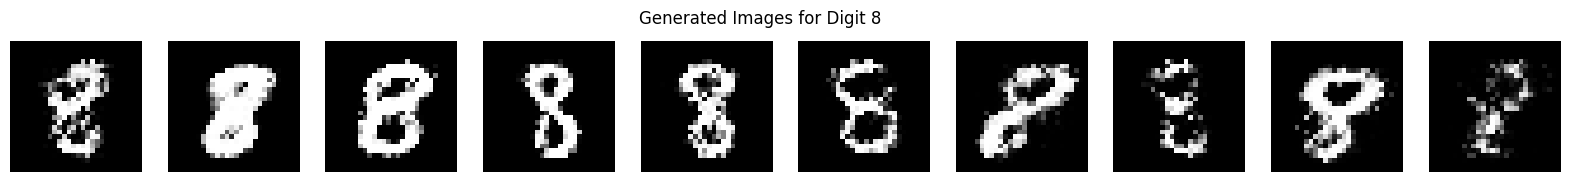

Epoch 23, MMD Loss: 0.025256752967834473


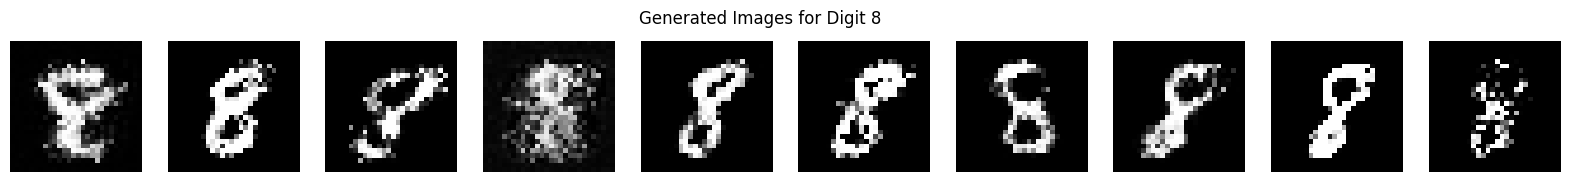

Epoch 24, MMD Loss: 0.028136253356933594


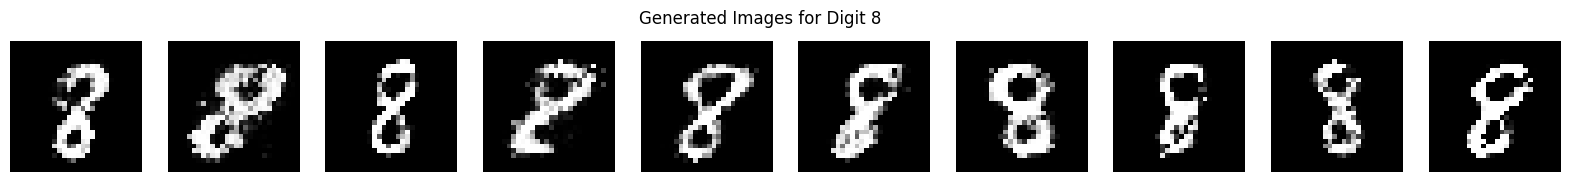

Epoch 25, MMD Loss: 0.02546370029449463


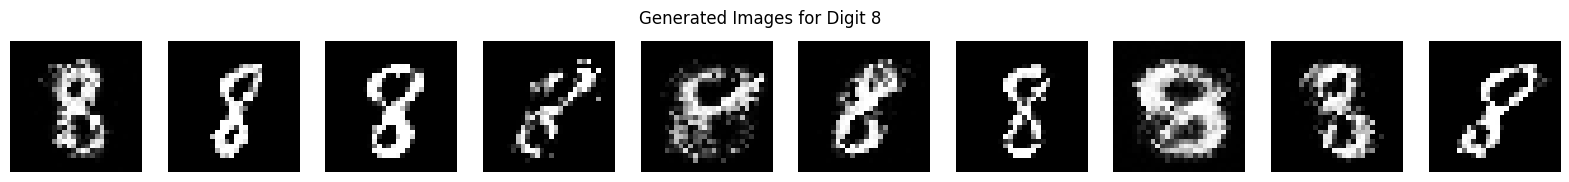

Epoch 26, MMD Loss: 0.025255918502807617


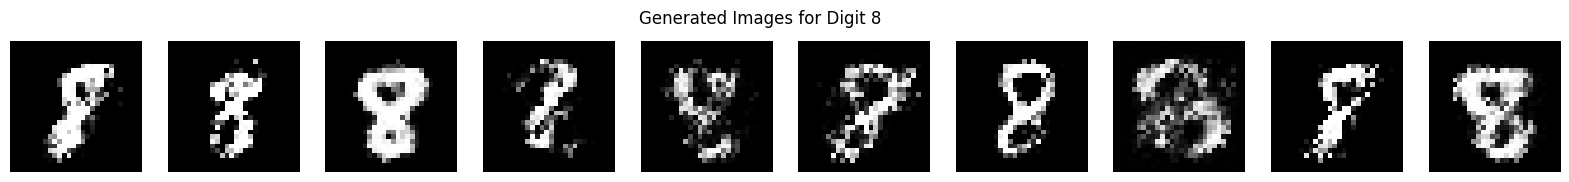

Epoch 27, MMD Loss: 0.026015520095825195


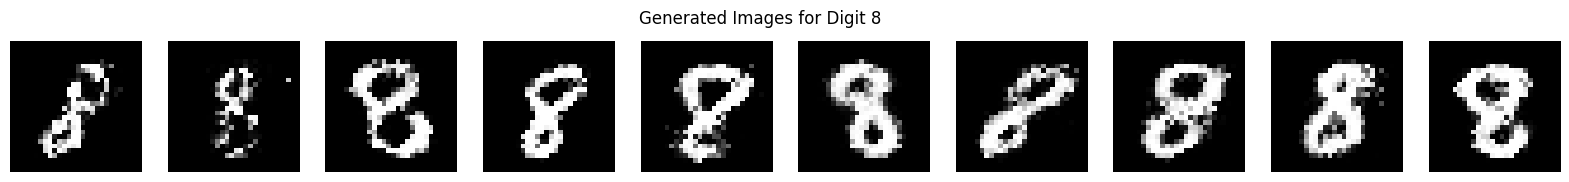

Epoch 28, MMD Loss: 0.03130197525024414


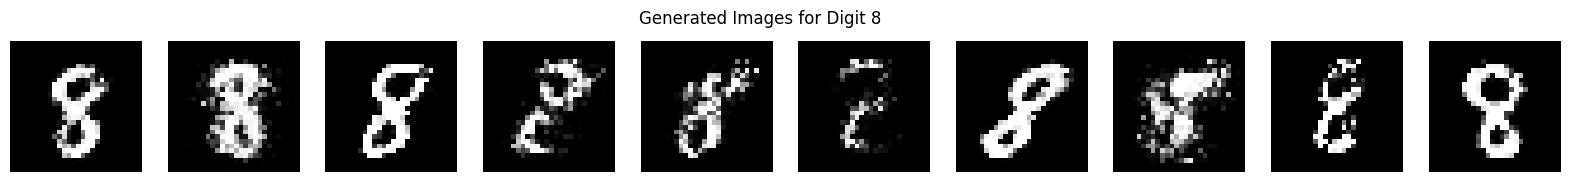

Epoch 29, MMD Loss: 0.03027021884918213


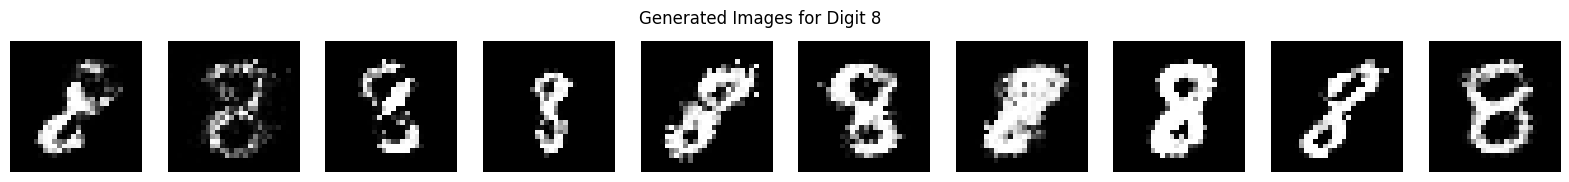

Epoch 30, MMD Loss: 0.02603912353515625


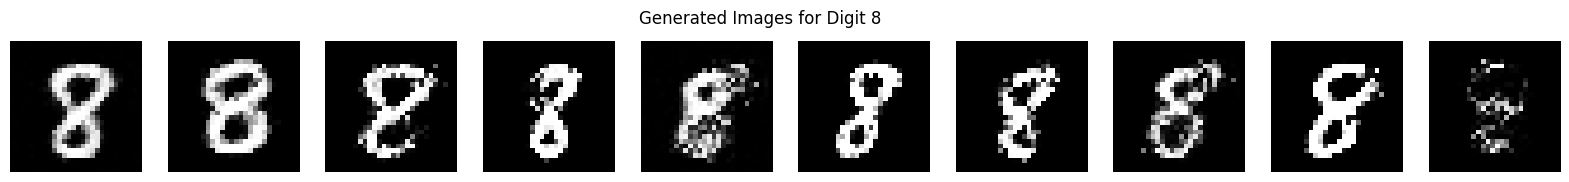

Epoch 31, MMD Loss: 0.025772809982299805


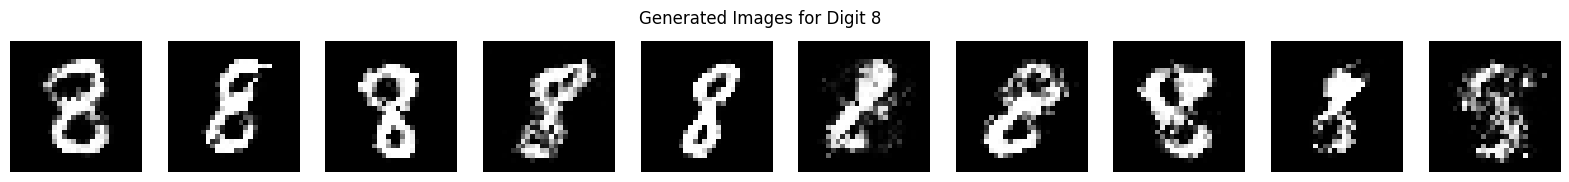

Epoch 32, MMD Loss: 0.02639591693878174


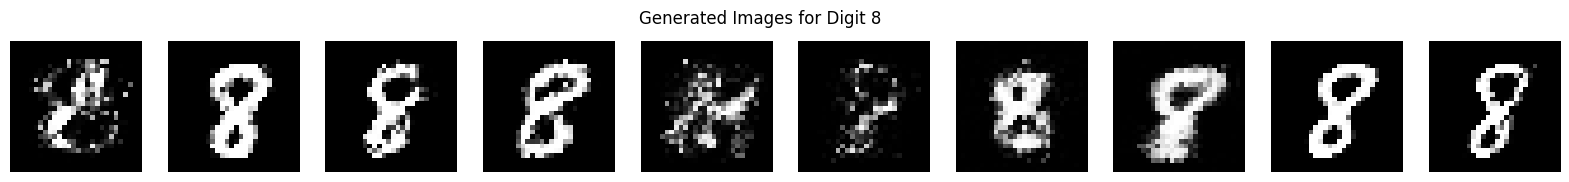

Epoch 33, MMD Loss: 0.02552211284637451


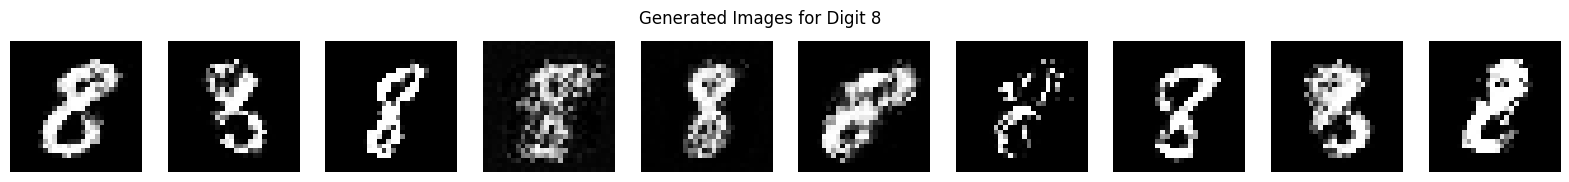

Epoch 34, MMD Loss: 0.024344205856323242


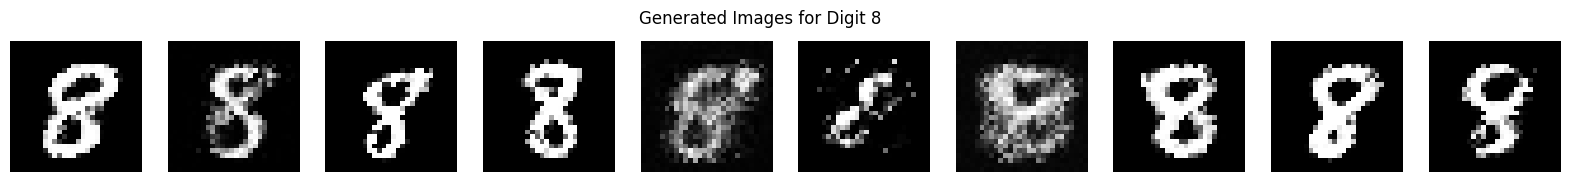

Epoch 35, MMD Loss: 0.024951815605163574


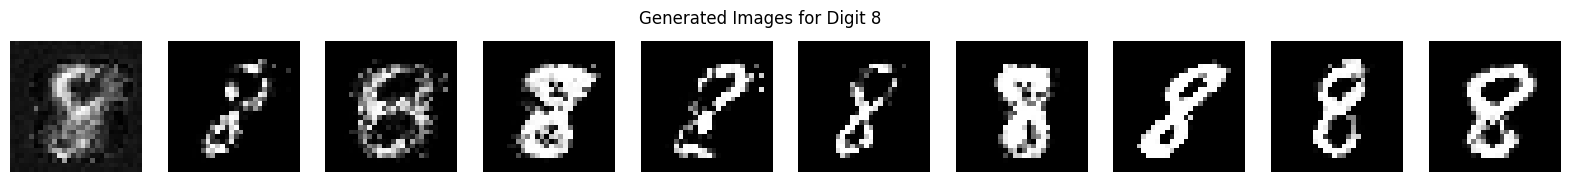

Epoch 36, MMD Loss: 0.023804187774658203


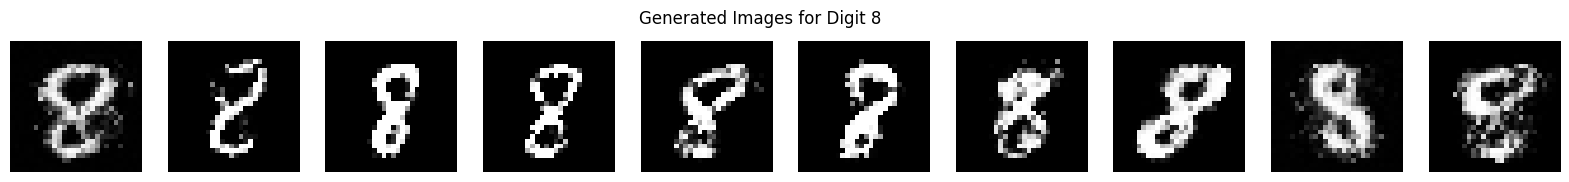

Epoch 37, MMD Loss: 0.026345372200012207


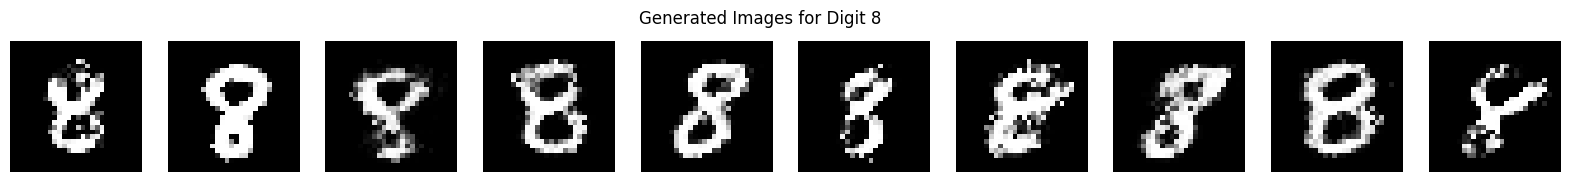

Epoch 38, MMD Loss: 0.02833724021911621


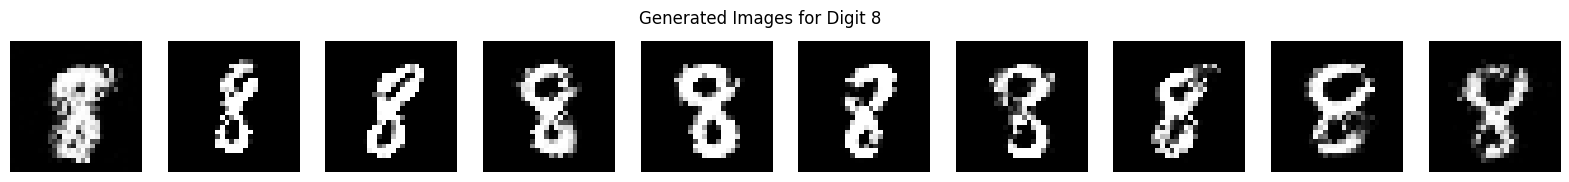

Epoch 39, MMD Loss: 0.0272064208984375


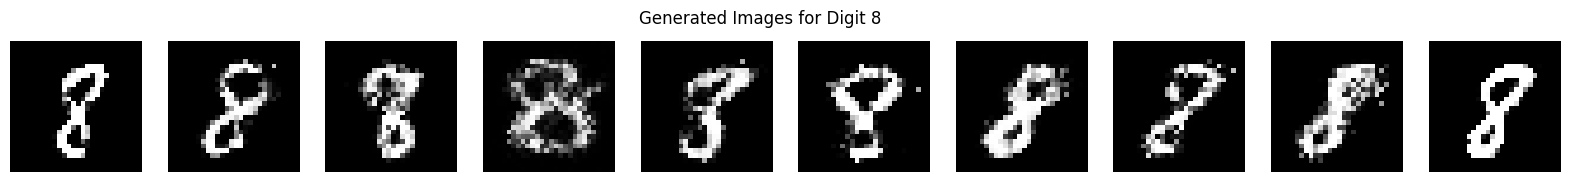

Epoch 40, MMD Loss: 0.023424148559570312


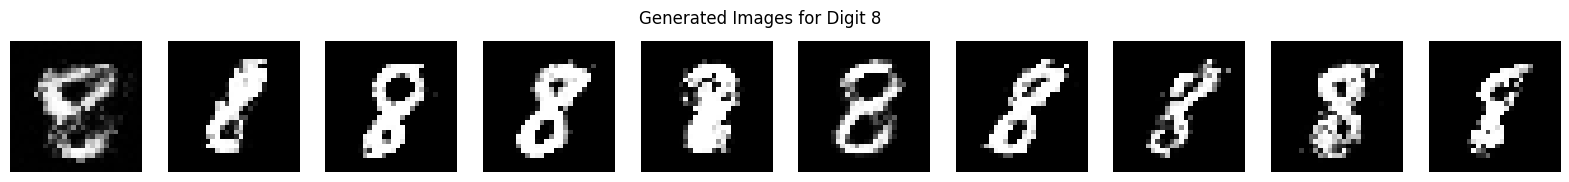

Epoch 41, MMD Loss: 0.02523505687713623


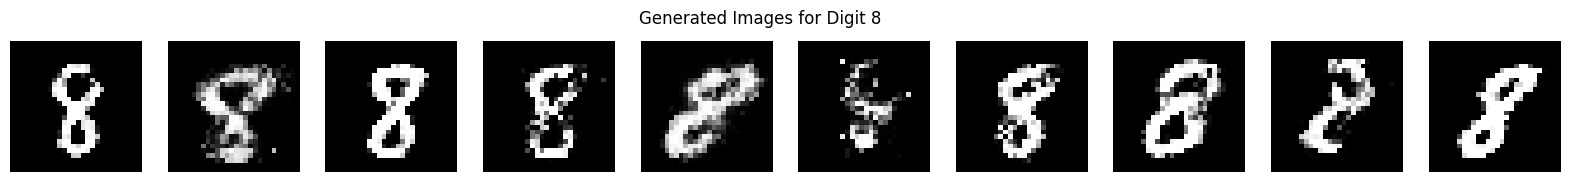

Epoch 42, MMD Loss: 0.030222296714782715


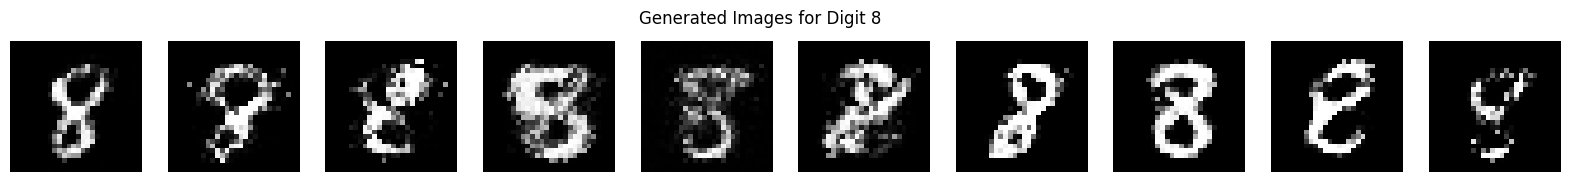

Epoch 43, MMD Loss: 0.023105502128601074


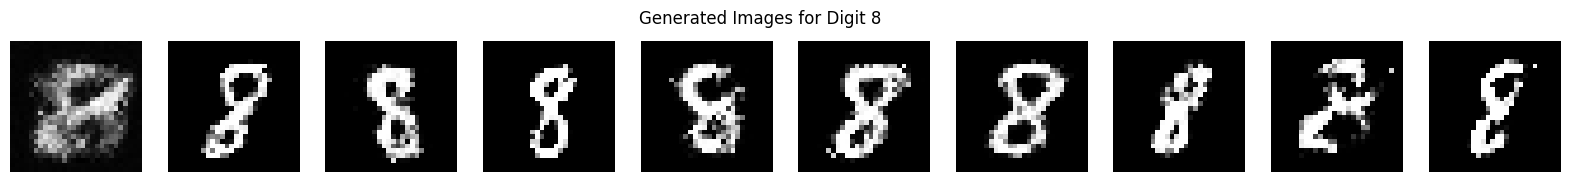

Epoch 44, MMD Loss: 0.02785181999206543


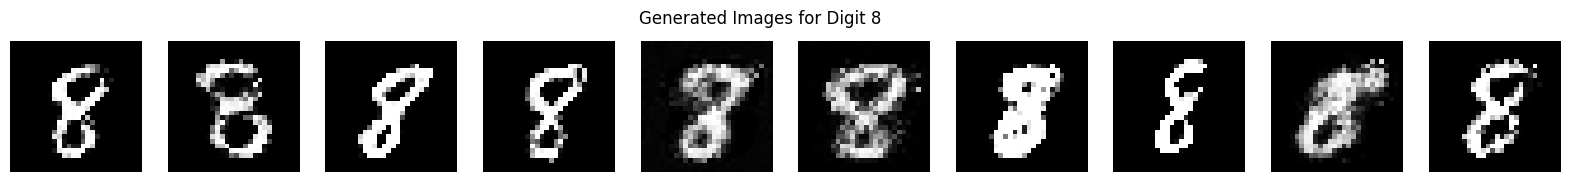

Epoch 45, MMD Loss: 0.023849010467529297


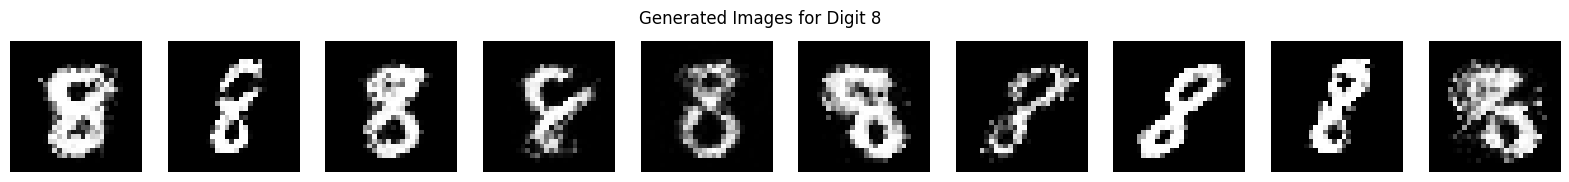

Epoch 46, MMD Loss: 0.024434566497802734


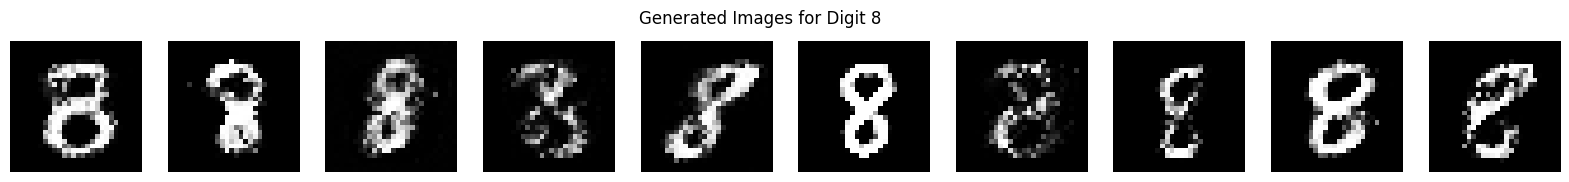

Epoch 47, MMD Loss: 0.02986276149749756


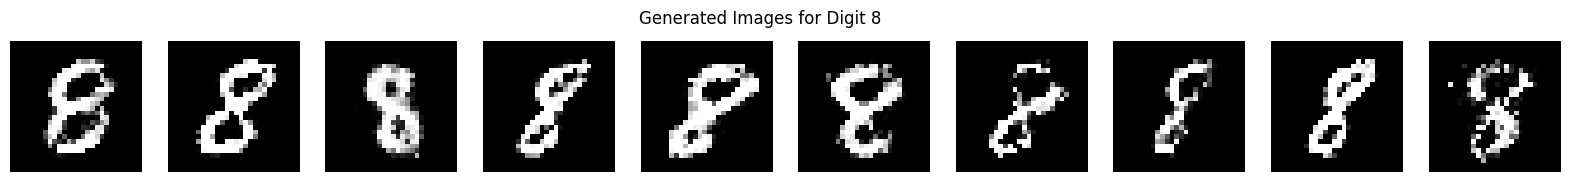

Epoch 48, MMD Loss: 0.026096105575561523


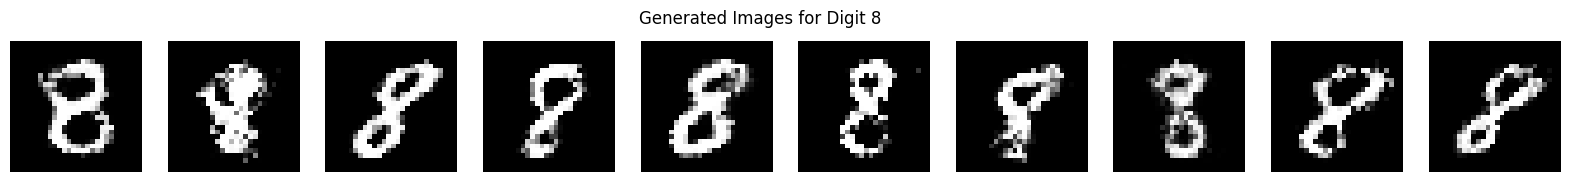

Epoch 49, MMD Loss: 0.02566683292388916


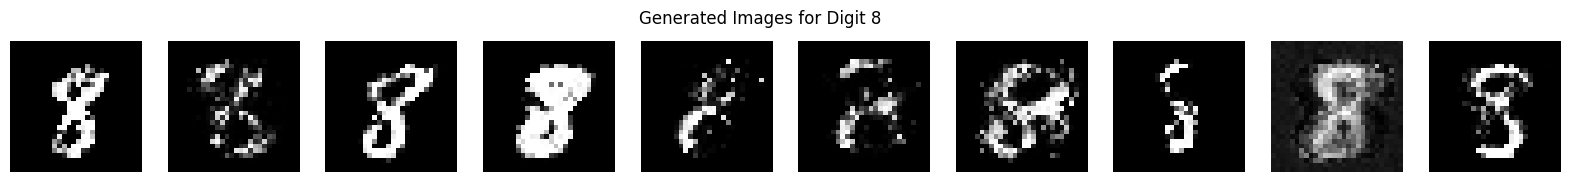

Epoch 50, MMD Loss: 0.02419734001159668


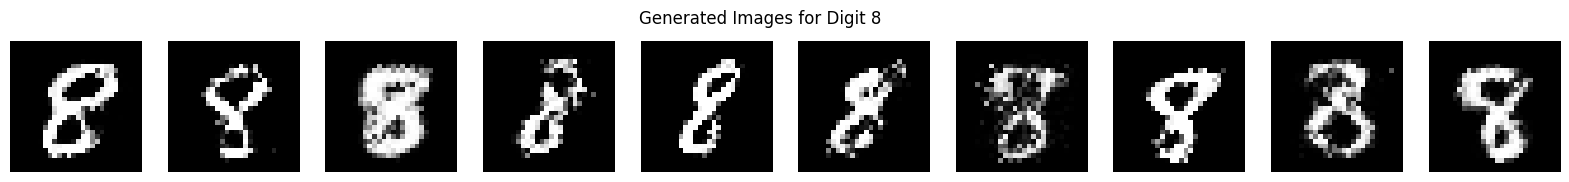

Epoch 51, MMD Loss: 0.02697122097015381


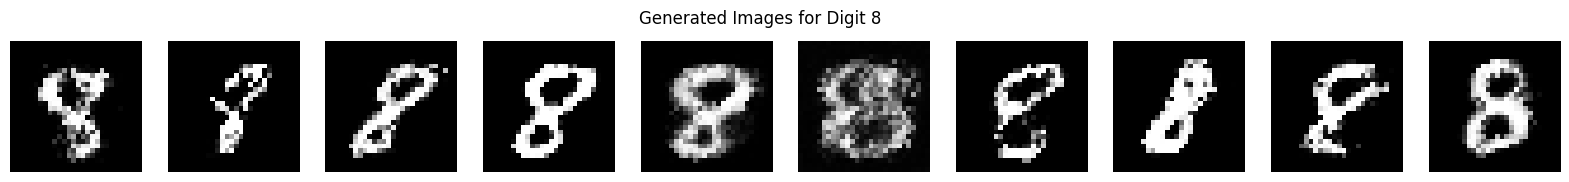

Epoch 52, MMD Loss: 0.025344014167785645


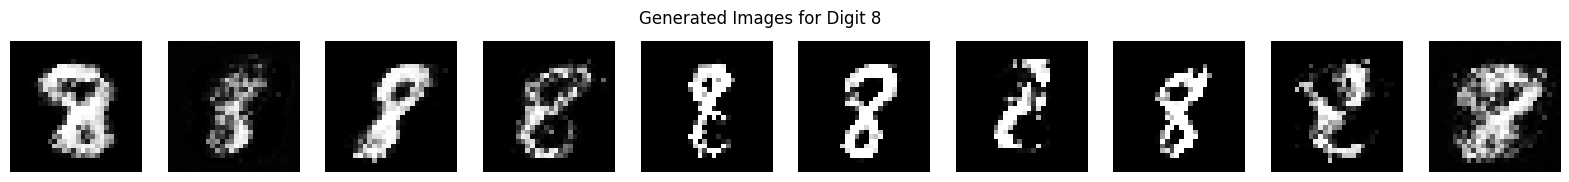

Epoch 53, MMD Loss: 0.025252342224121094


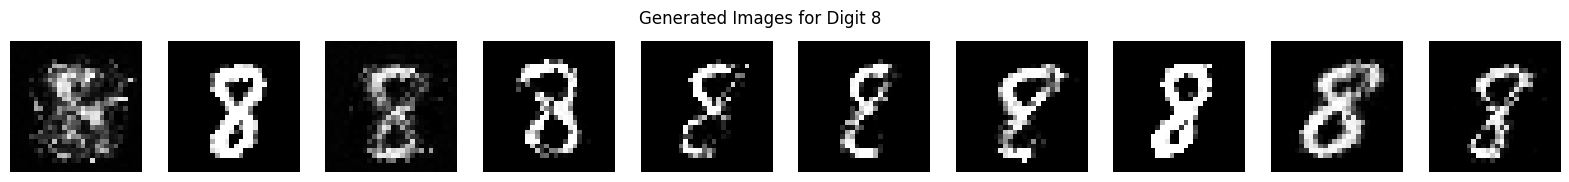

Epoch 54, MMD Loss: 0.028872370719909668


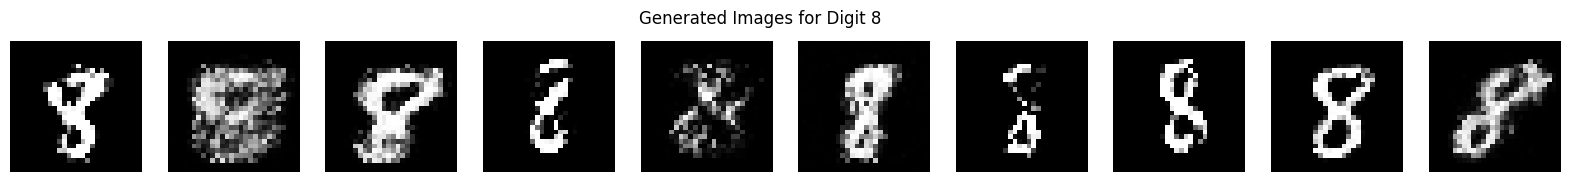

Epoch 55, MMD Loss: 0.022756099700927734


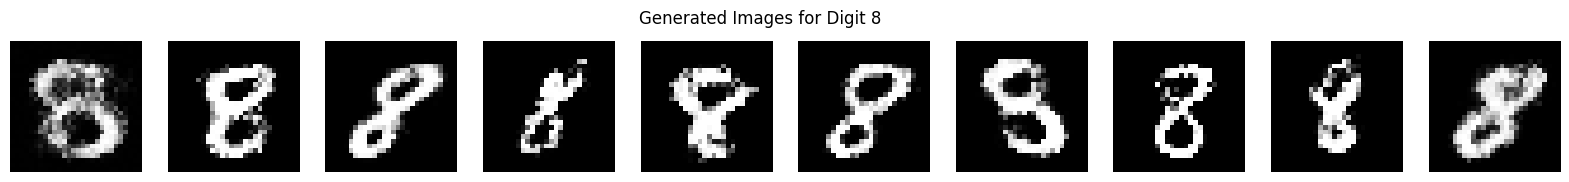

Epoch 56, MMD Loss: 0.02342665195465088


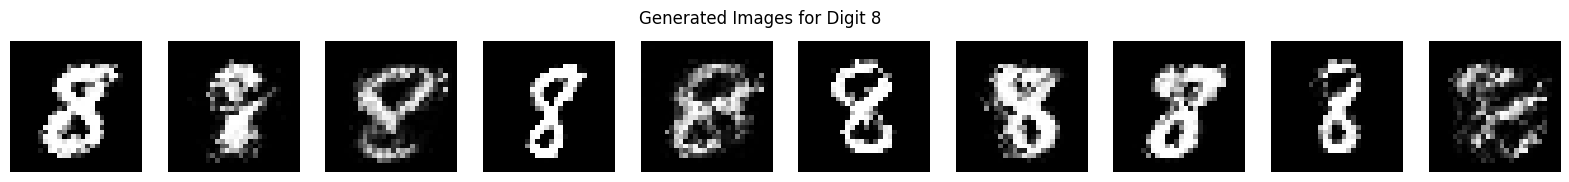

Epoch 57, MMD Loss: 0.023951053619384766


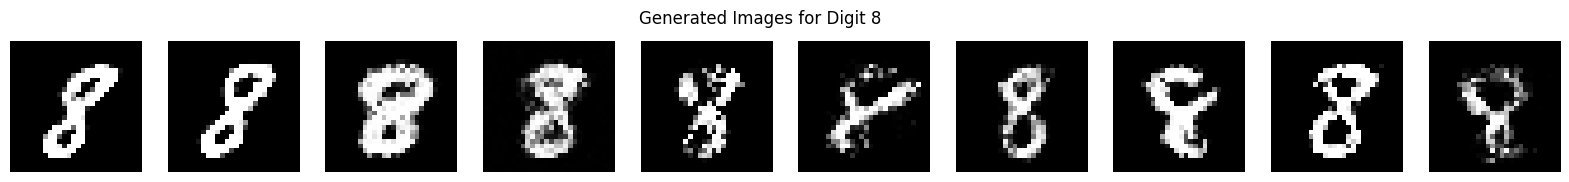

Epoch 58, MMD Loss: 0.02315497398376465


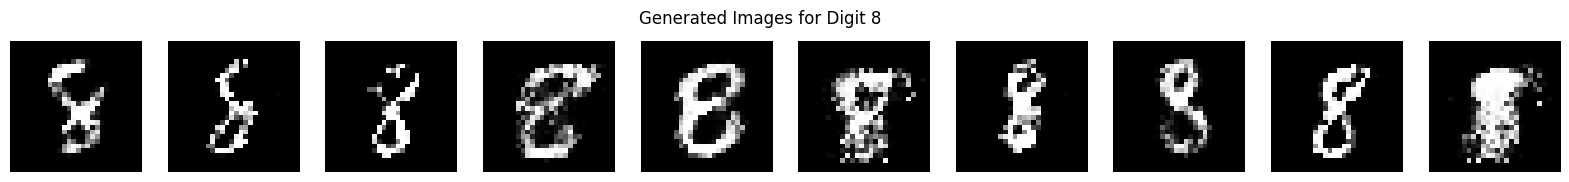

Epoch 59, MMD Loss: 0.0232388973236084


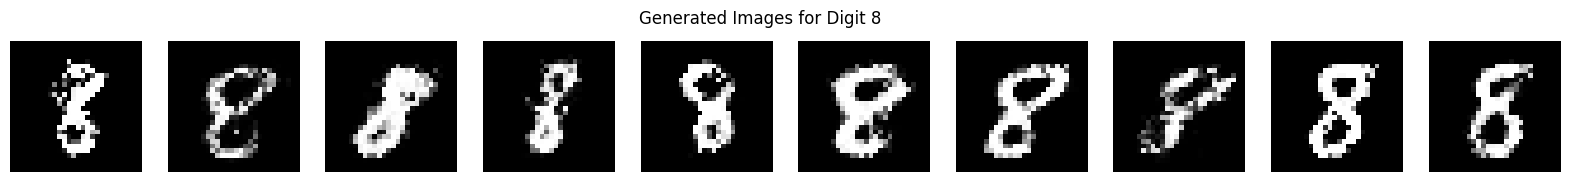

Epoch 60, MMD Loss: 0.025187015533447266


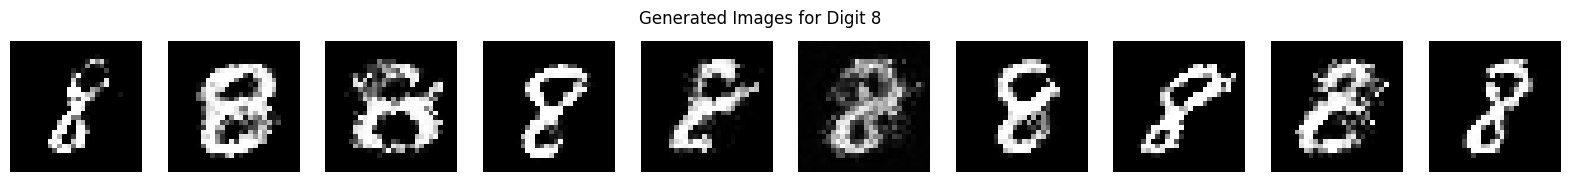

Epoch 61, MMD Loss: 0.029981017112731934


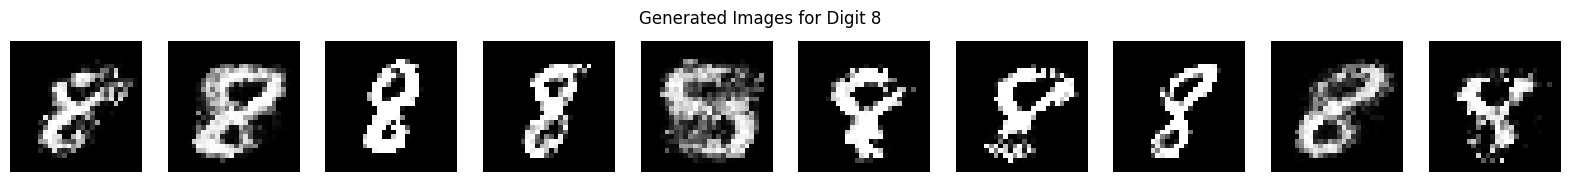

Epoch 62, MMD Loss: 0.024616360664367676


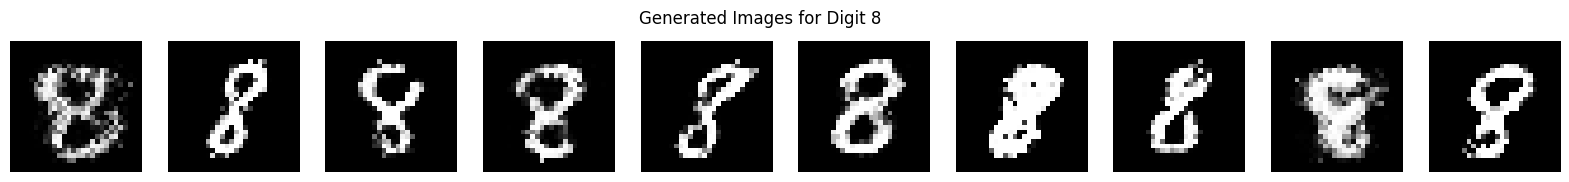

Epoch 63, MMD Loss: 0.026778817176818848


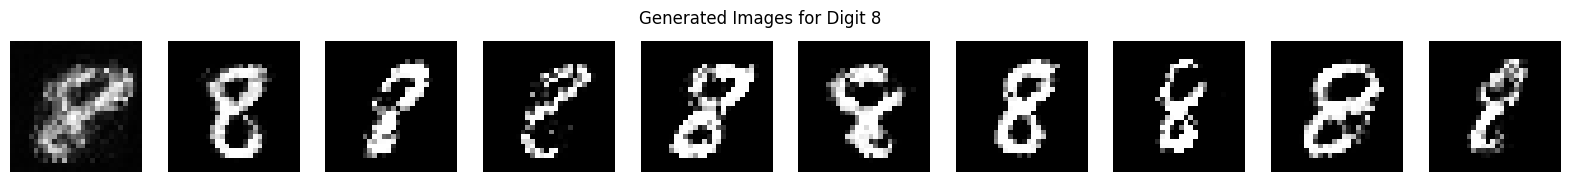

Epoch 64, MMD Loss: 0.024734854698181152


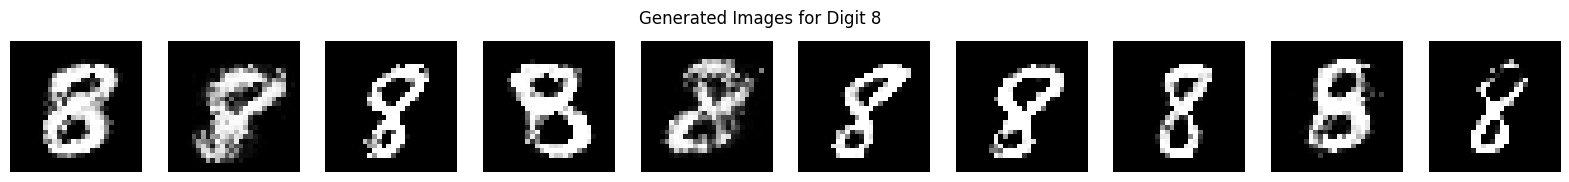

Epoch 65, MMD Loss: 0.022334933280944824


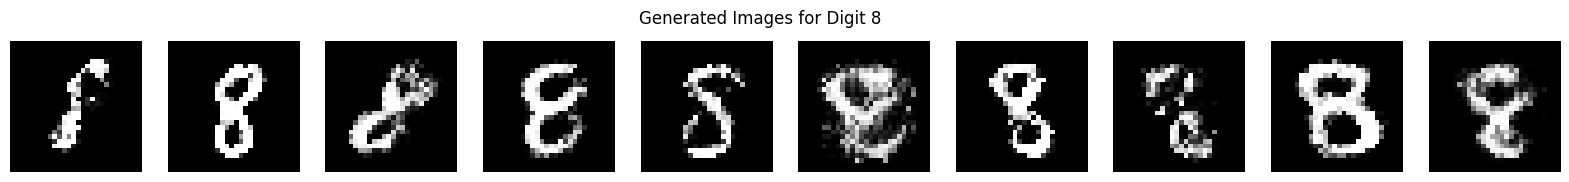

Epoch 66, MMD Loss: 0.027898430824279785


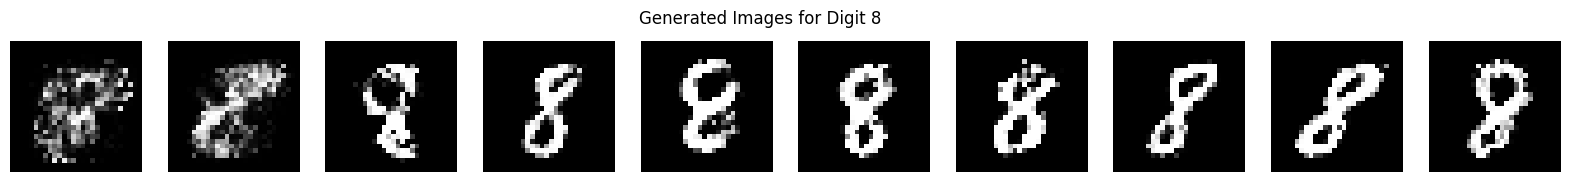

Epoch 67, MMD Loss: 0.028735756874084473


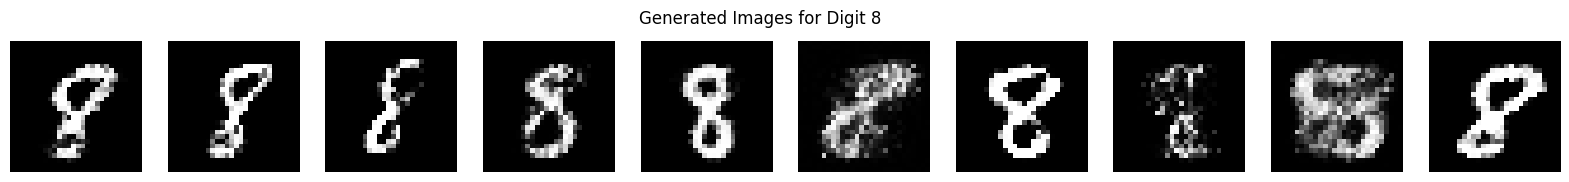

Epoch 68, MMD Loss: 0.02691173553466797


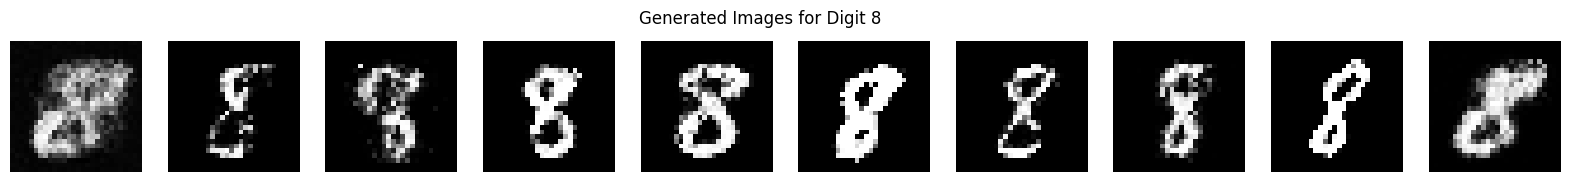

Epoch 69, MMD Loss: 0.02685225009918213


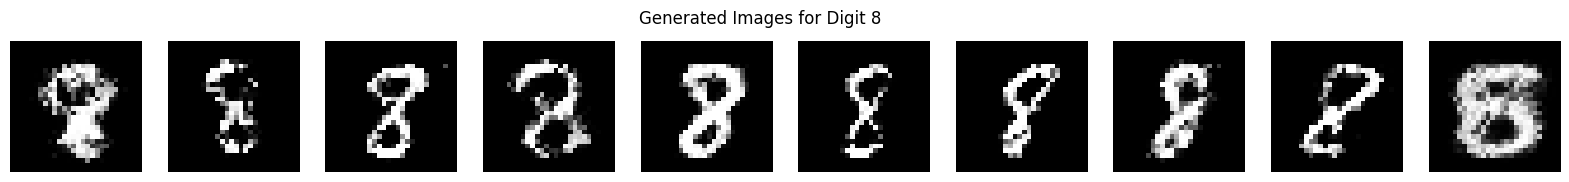

Epoch 70, MMD Loss: 0.023281574249267578


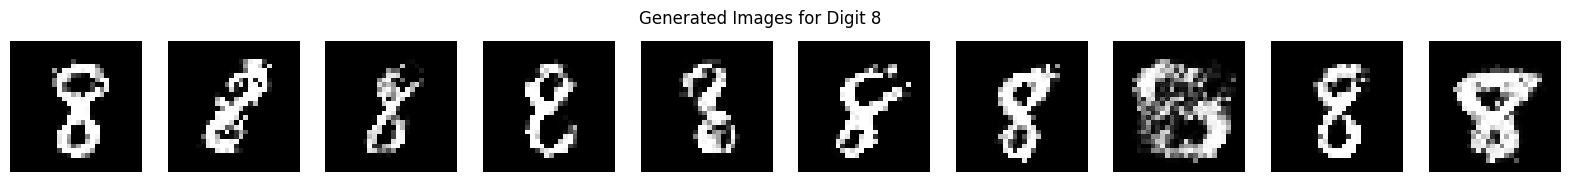

Epoch 71, MMD Loss: 0.022885680198669434


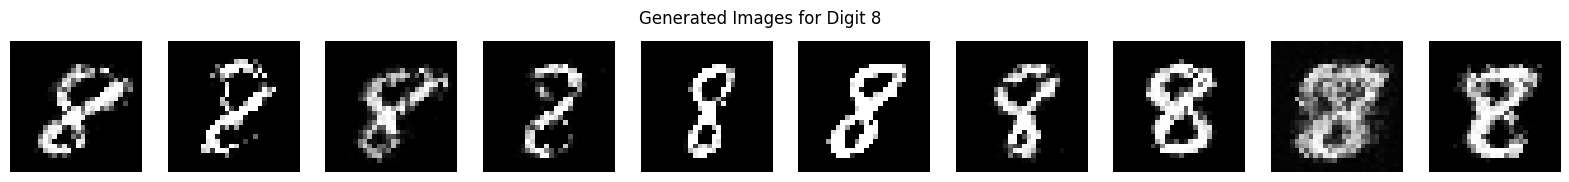

Epoch 72, MMD Loss: 0.02340078353881836


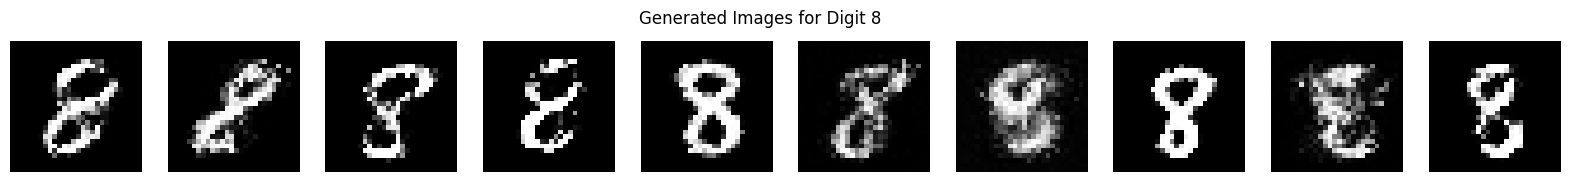

Epoch 73, MMD Loss: 0.028531670570373535


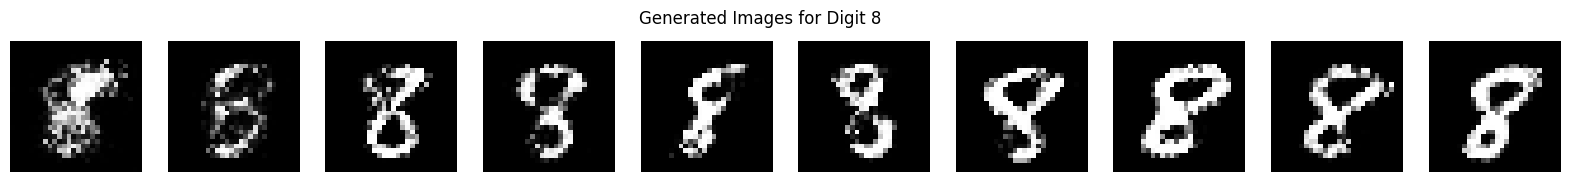

Epoch 74, MMD Loss: 0.023926377296447754


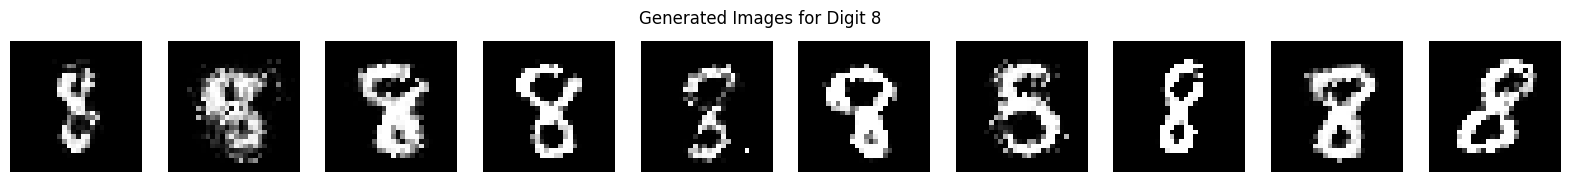

Epoch 75, MMD Loss: 0.023735880851745605


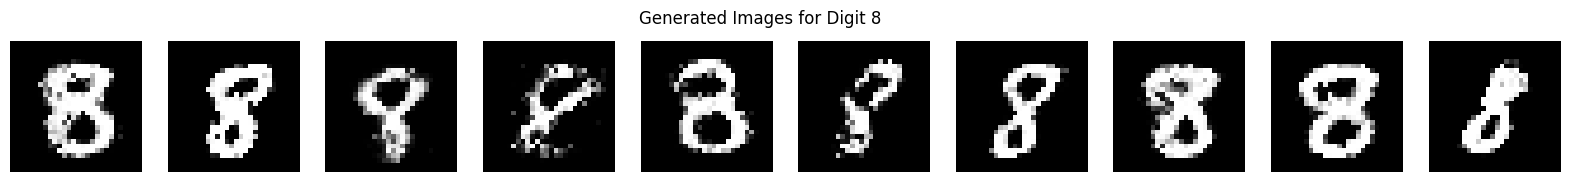

Epoch 76, MMD Loss: 0.02847111225128174


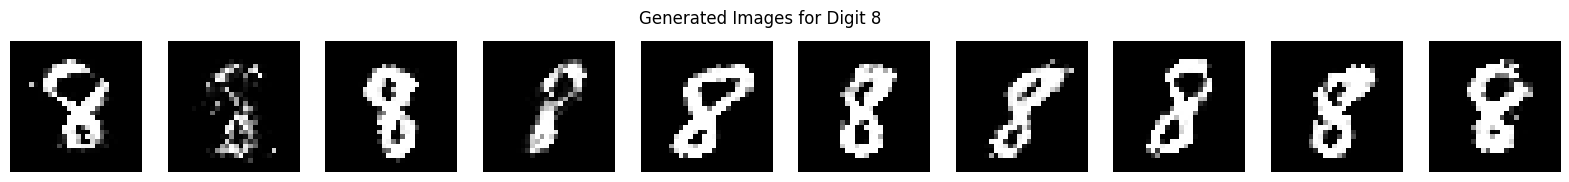

Epoch 77, MMD Loss: 0.028368473052978516


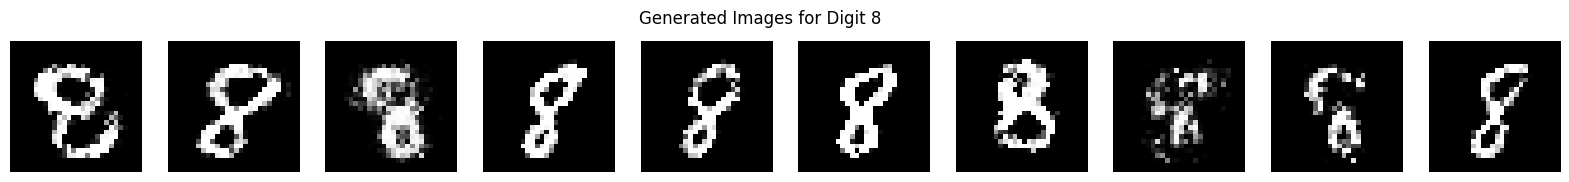

Epoch 78, MMD Loss: 0.02538609504699707


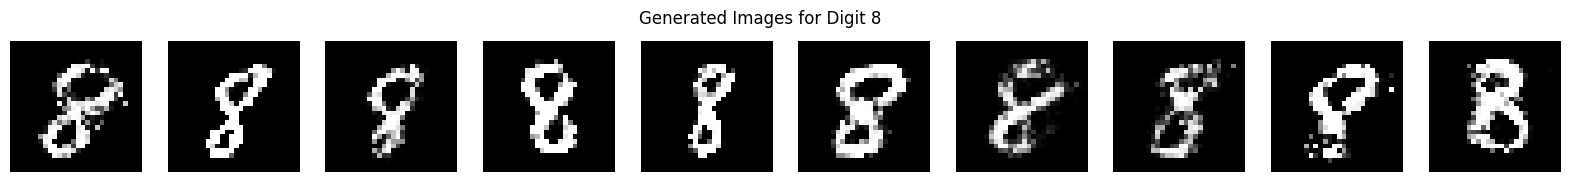

Epoch 79, MMD Loss: 0.024217844009399414


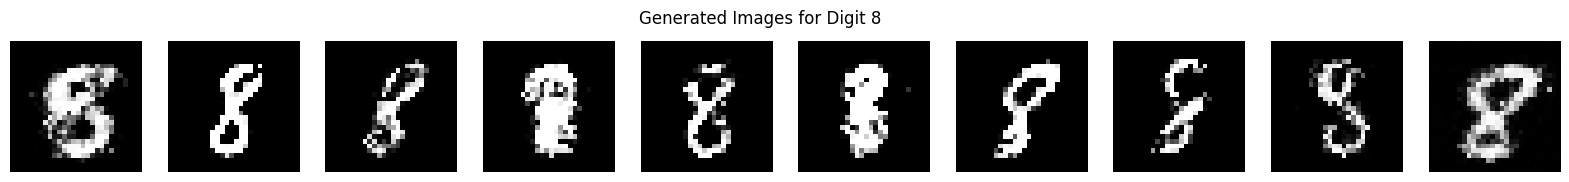

Epoch 80, MMD Loss: 0.027928590774536133


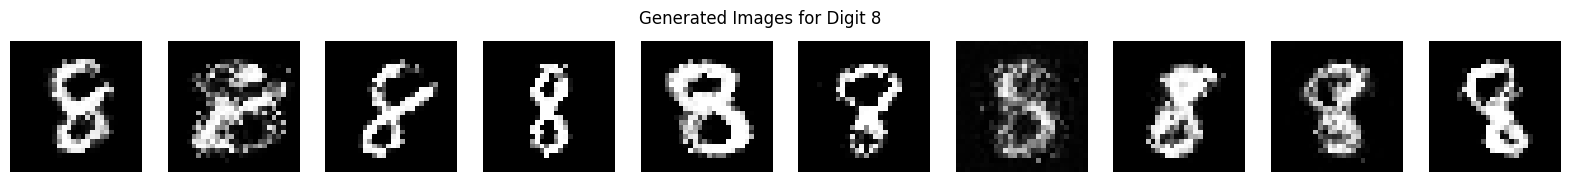

Epoch 81, MMD Loss: 0.025112032890319824


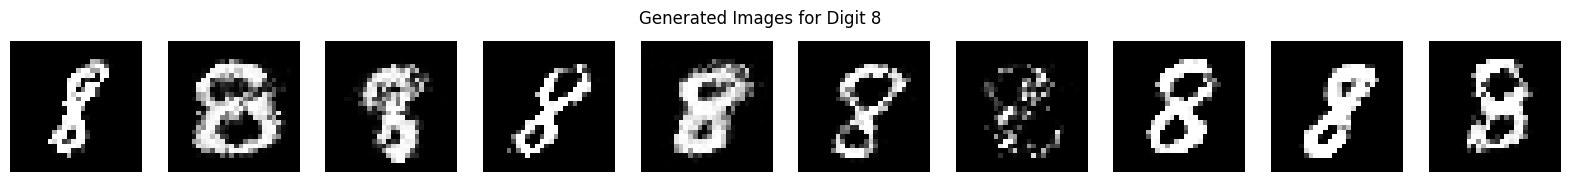

Epoch 82, MMD Loss: 0.029627203941345215


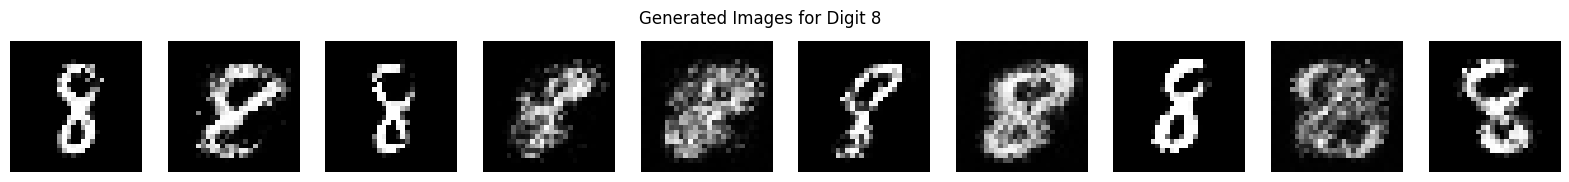

Epoch 83, MMD Loss: 0.03060305118560791


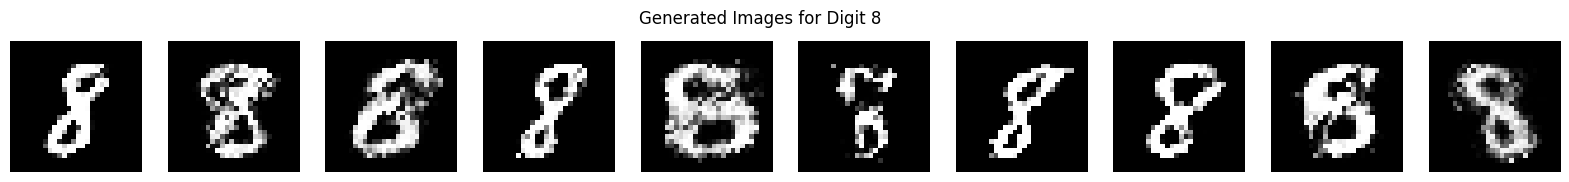

Epoch 84, MMD Loss: 0.021893978118896484


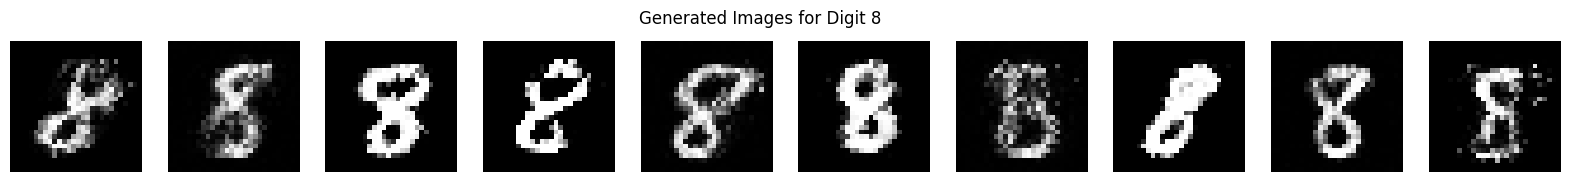

Epoch 85, MMD Loss: 0.02239382266998291


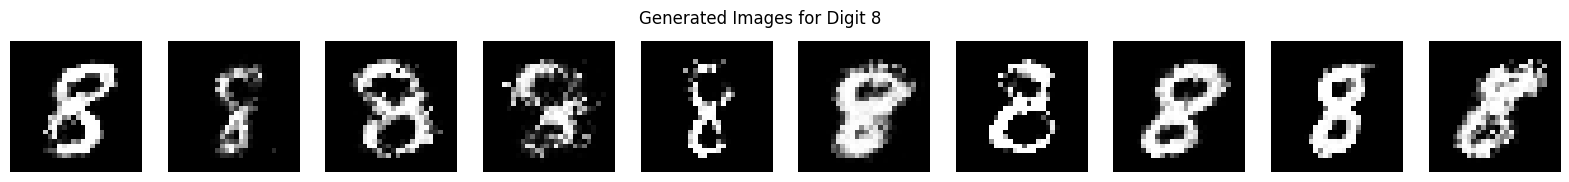

Epoch 86, MMD Loss: 0.021892070770263672


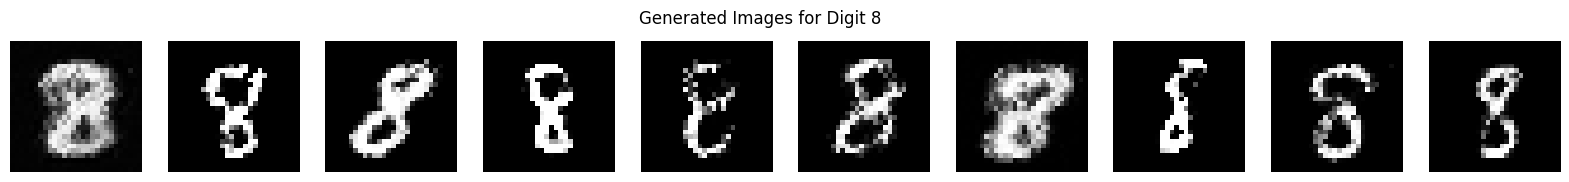

Epoch 87, MMD Loss: 0.027185678482055664


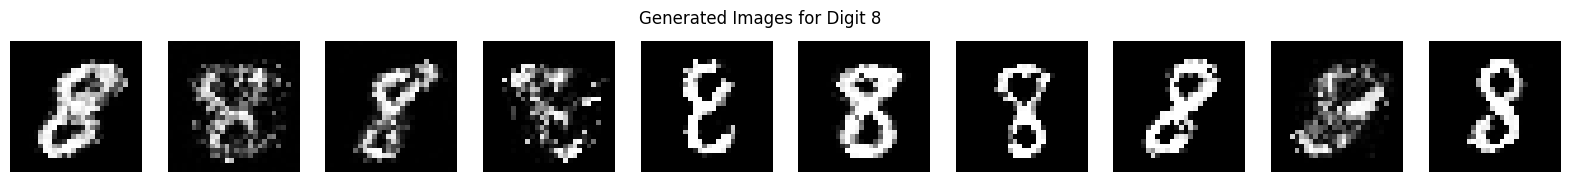

Epoch 88, MMD Loss: 0.0291975736618042


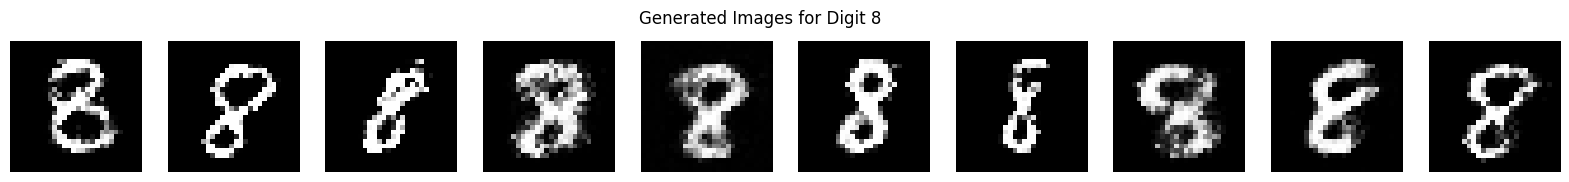

Epoch 89, MMD Loss: 0.02270519733428955


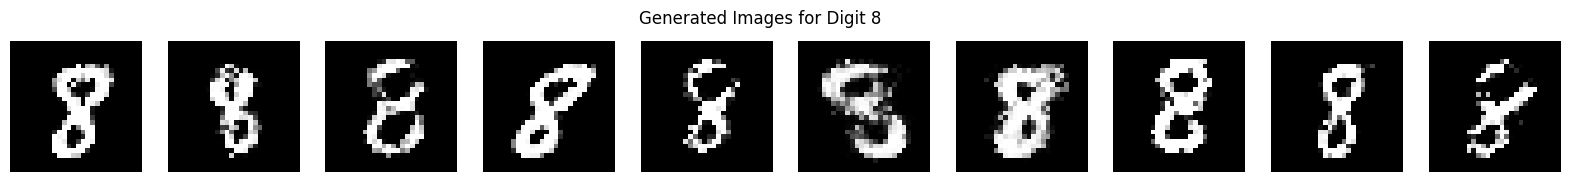

Epoch 90, MMD Loss: 0.026952743530273438


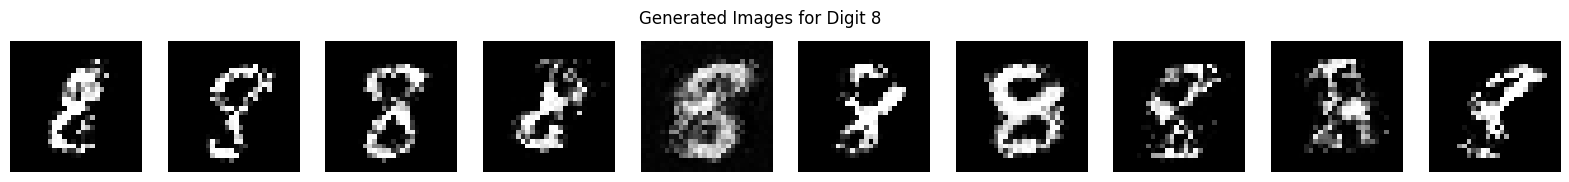

Epoch 91, MMD Loss: 0.026853442192077637


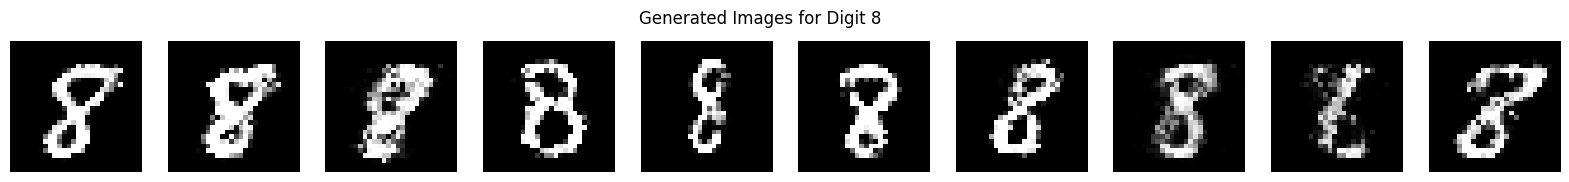

Epoch 92, MMD Loss: 0.025943398475646973


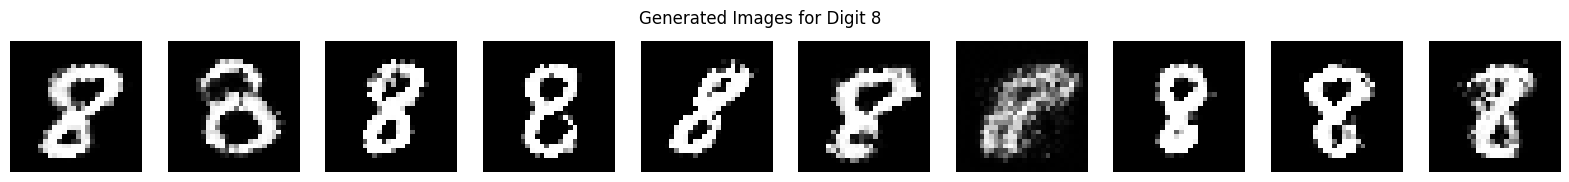

Epoch 93, MMD Loss: 0.025411248207092285


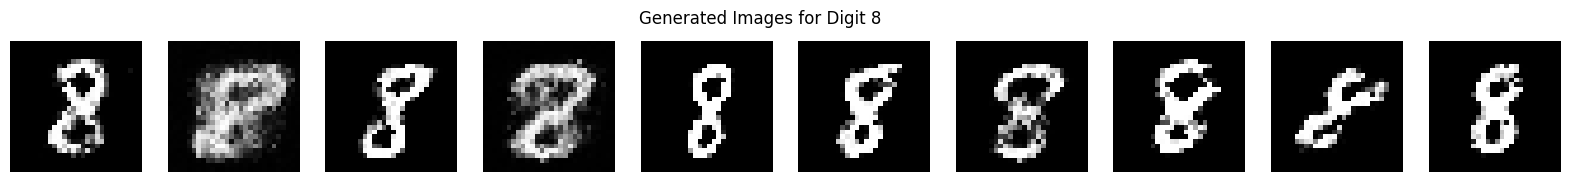

Epoch 94, MMD Loss: 0.02439284324645996


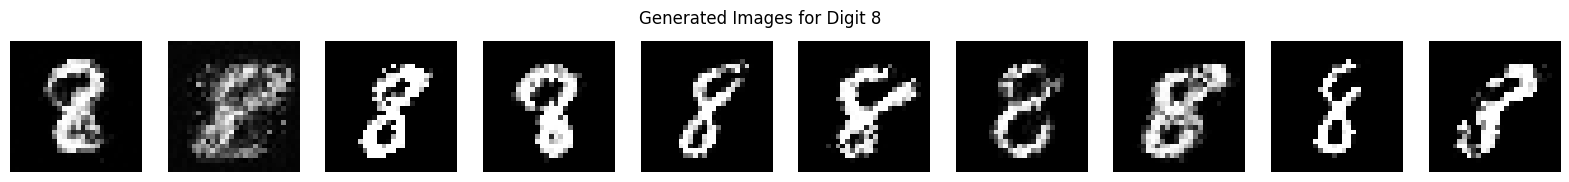

Epoch 95, MMD Loss: 0.02432870864868164


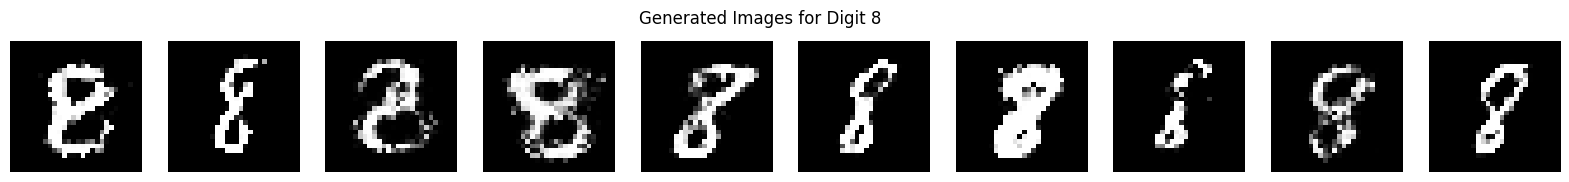

Epoch 96, MMD Loss: 0.026687979698181152


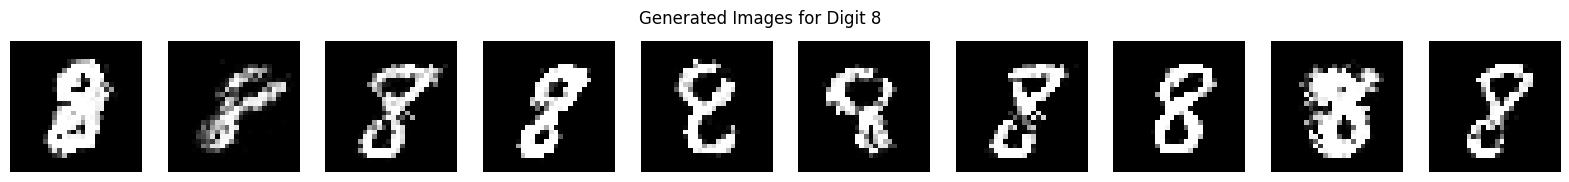

Epoch 97, MMD Loss: 0.026947855949401855


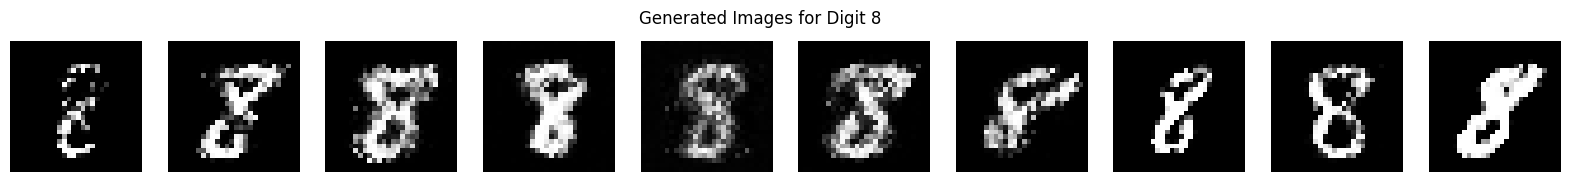

Epoch 98, MMD Loss: 0.023501873016357422


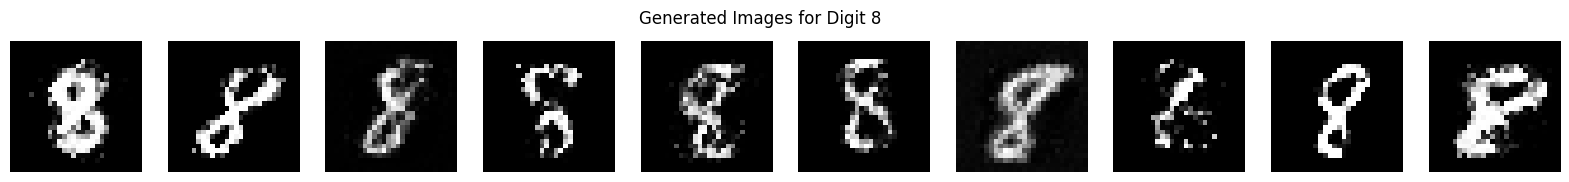

Epoch 99, MMD Loss: 0.02349853515625


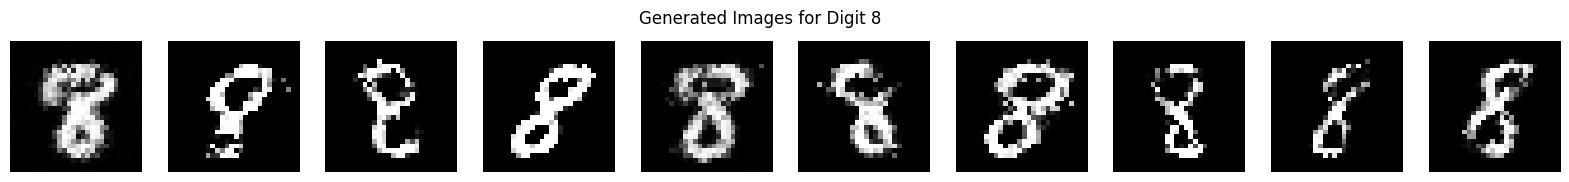

Epoch 100, MMD Loss: 0.02367234230041504


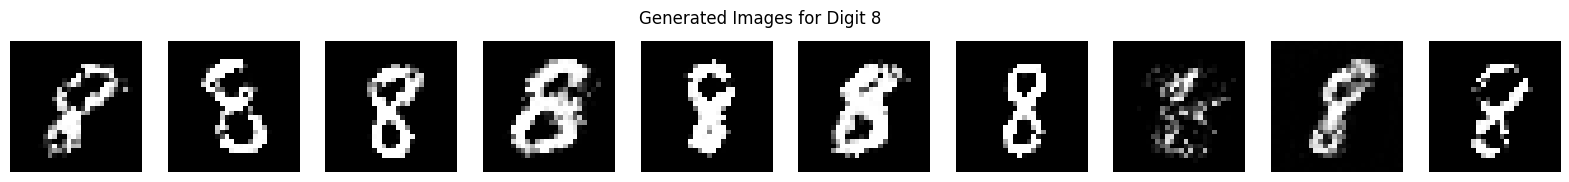

In [8]:
# Assume GMMN and compute_mmd are defined as before

def train_model_for_digit(digit_dataset, i):
    model = models[i]
    optimizer = tf.keras.optimizers.legacy.Adam()

    epochs = 10  # You might adjust this based on experimentation
    for epoch in range(epochs):
        for real_images in digit_dataset:
            with tf.GradientTape() as tape:
                noise = tf.random.normal([real_images.shape[0], 100])  # 100-dimensional noise vector
                generated_images = model(noise)
                mmd_loss = compute_mmd(real_images, generated_images)
            
            gradients = tape.gradient(mmd_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        print(f'Epoch {epoch+1}, MMD Loss: {mmd_loss.numpy()}')
        generate_images(model, digit=i)
    return model

for i, dataset in enumerate(datasets):
    print(f"Training model for digit {i}")
    model = train_model_for_digit(dataset, i)


In [11]:
# target_digit = 8
# models[target_digit].save_weights(f'gmmn_model_{target_digit}.h5')

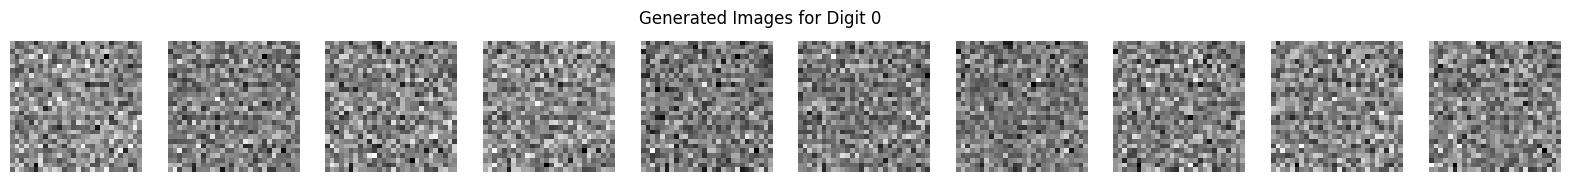

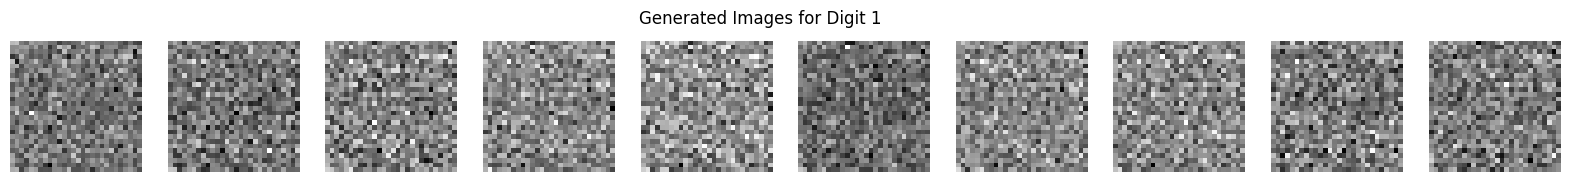

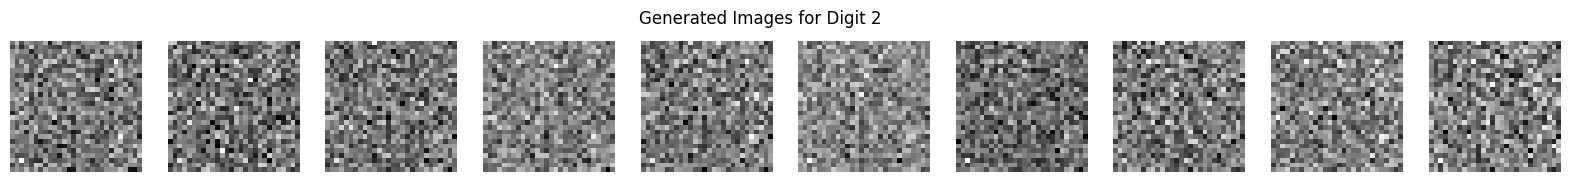

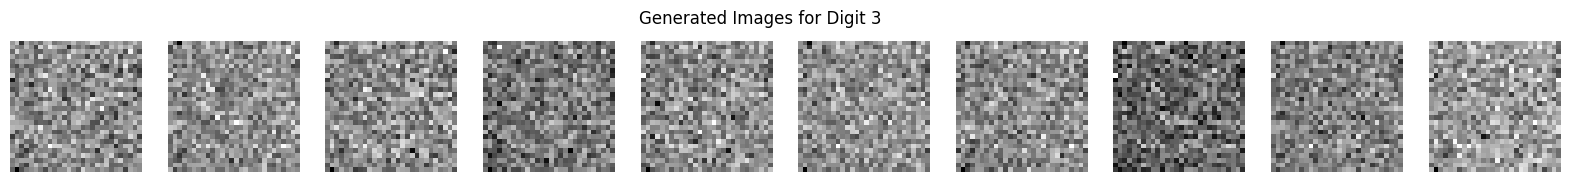

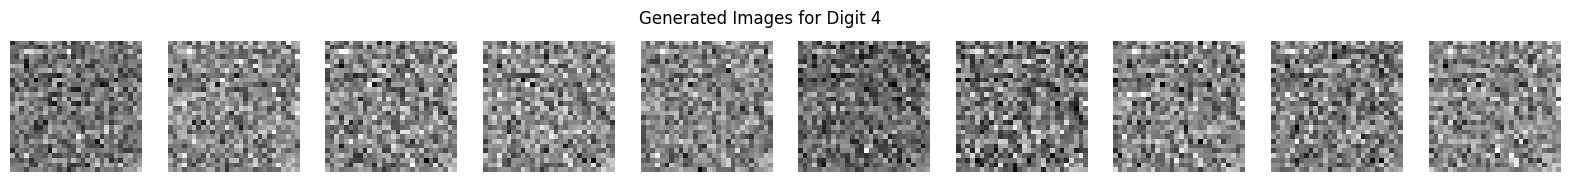

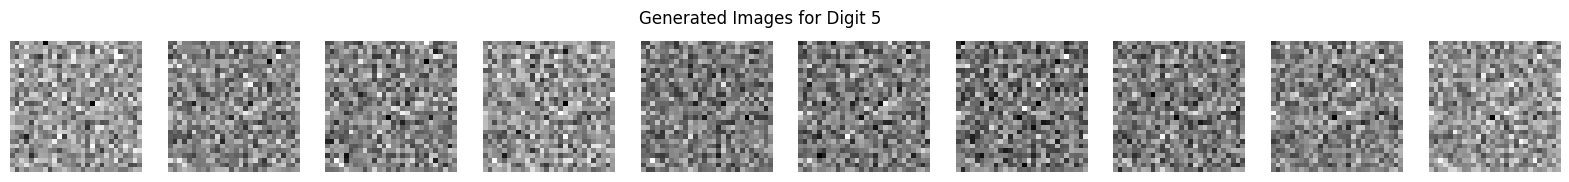

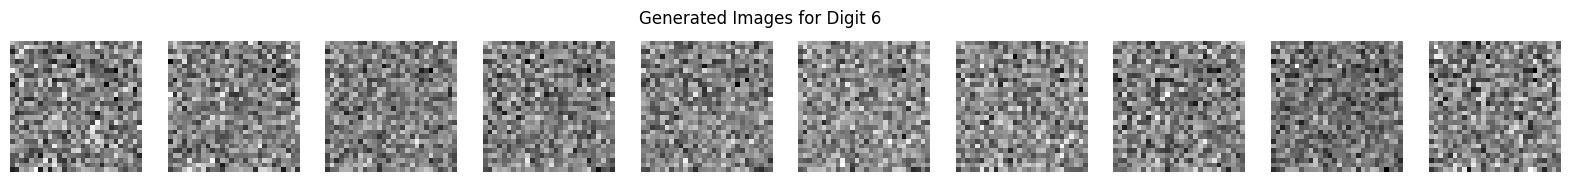

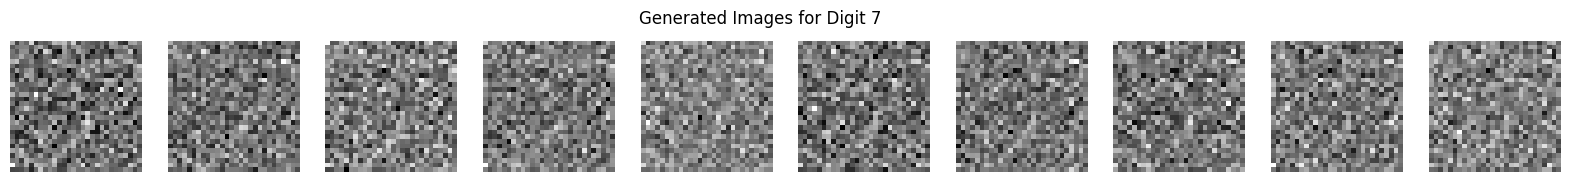

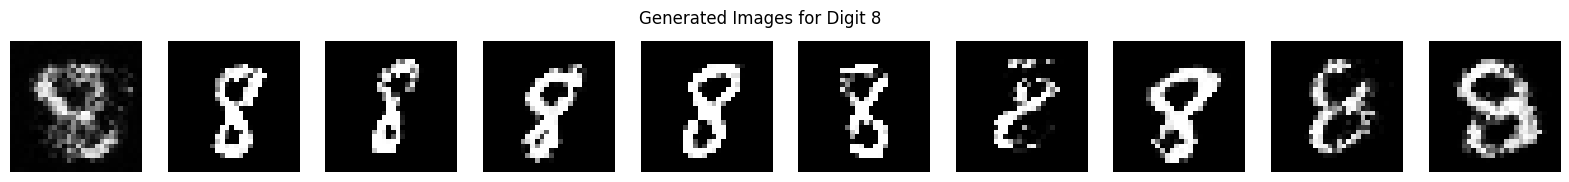

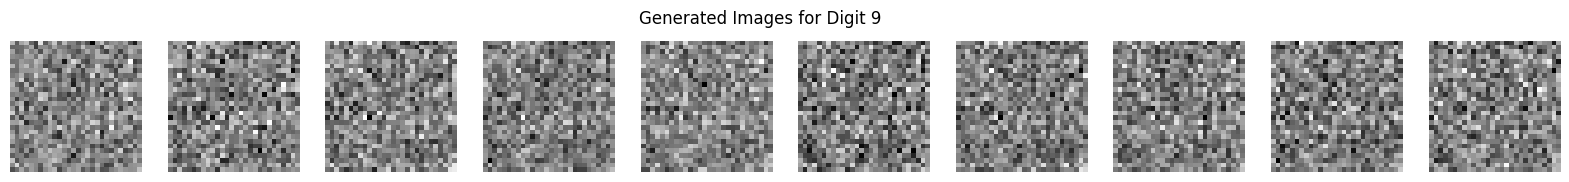

In [9]:
# Generate and display images for each digit
for i, model in enumerate(models):
    generate_images(model, digit=i)
    